In [2]:
import os
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/commit.csv')
pr_df = pd.read_csv('C:/Users/Admin/Downloads/pr.csv')
issue_df = pd.read_csv('C:/Users/Admin/Downloads/issue.csv')
file_df = pd.read_csv('C:/Users/Admin/Downloads/file_data.csv')
language_df = pd.read_csv('C:/Users/Admin/Downloads/languages.csv')
repo_df = pd.read_csv('C:/Users/Admin/Downloads/repo.csv')
df_commit_contrib = pd.read_csv('C:/Users/Admin/Downloads/df_commit_contrib.csv')

In [3]:
issue_df

Author  Comment user           Created_at            Closed_at  \
0     alextran1502           NaN  2022-02-05 07:04:44  2022-02-06 06:26:15   
1     alextran1502           NaN  2022-02-06 06:37:08  2022-02-06 06:50:47   
2     alextran1502  alextran1502  2022-02-06 06:37:24  2022-02-08 03:44:44   
3     alextran1502  alextran1502  2022-02-06 06:37:29  2022-02-08 06:27:24   
4     alextran1502           NaN  2022-02-06 06:57:52  2022-02-07 02:32:09   
...            ...           ...                  ...                  ...   
3033     Mubelotix      mmomjian  2024-06-14 15:21:48  2024-06-14 15:25:11   
3034      seanmuth           NaN  2024-06-14 15:53:39  2024-06-14 15:55:07   
3035      arnar-th        bo0tzz  2024-06-14 18:32:00  2024-06-14 21:26:48   
3036  manuelcortez           NaN  2024-06-14 22:39:28                  NaN   
3037      eygraber           NaN  2024-06-14 23:52:27  2024-06-15 00:56:58   

       State           Labels         Assignees  
0     closed      ['feature']  ['alextran1502']  
1     closed               []                []  
2     closed  ['enhancement']                []  
3     closed  ['enhancement']                []  
4     closed  ['enhancement']                []  
...      ...              ...               ...  
3033  closed               []                []  
3034  closed               []                []  
3035  closed               []                []  
3036    open               []                []  
3037  closed               []                []  

[3038 rows x 7 columns]

In [4]:
pr_df

Author         Reviewer Pr_state           Created_at  \
0      alextran1502              NaN   closed  2022-02-06 06:07:43   
1           schklom              NaN   closed  2022-02-06 18:08:06   
2      alextran1502              NaN   closed  2022-02-07 02:28:28   
3      alextran1502              NaN   closed  2022-02-08 05:42:11   
4      alextran1502              NaN   closed  2022-02-08 17:24:07   
...             ...              ...      ...                  ...   
4413    zackpollard           bo0tzz   closed  2024-06-13 11:13:55   
4414   alextran1502          jrasm91     open  2024-06-13 12:33:47   
4415    zackpollard          jrasm91   closed  2024-06-13 12:38:18   
4416       waclaw66  michelheusschen     open  2024-06-13 12:48:13   
4417  richard-salam              NaN     open  2024-06-13 13:31:14   

               Updated_at  Additions  Commits            Merged_at  
0     2024-05-29 17:11:53        581       14  2022-02-06 06:07:56  
1     2024-03-09 04:16:39         53        2  2022-02-06 19:06:01  
2     2024-03-09 23:22:33        133        3  2022-02-07 02:31:32  
3     2024-02-13 22:15:20      10715        2  2022-02-08 05:42:35  
4     2024-03-12 15:28:50        343        2  2022-02-08 17:24:49  
...                   ...        ...      ...                  ...  
4413  2024-06-13 11:37:43          7        2  2024-06-13 11:37:15  
4414  2024-06-13 13:18:29         36        4                  NaN  
4415  2024-06-13 12:44:07          0        1  2024-06-13 12:44:06  
4416  2024-06-13 13:41:07        102        1                  NaN  
4417  2024-06-13 13:31:29          8        1                  NaN  

[4418 rows x 8 columns]

In [5]:
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
start = datetime.datetime(2022,2,3)
end = datetime.datetime(2024, 6, 10)

In [6]:
sns.set_style('whitegrid')

In [7]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
commit_counts = df.groupby(df['Updated at'].dt.date).size()
commit_counts = commit_counts.reset_index(name = 'Commit count')

Biểu đồ số lượng commit theo ngày

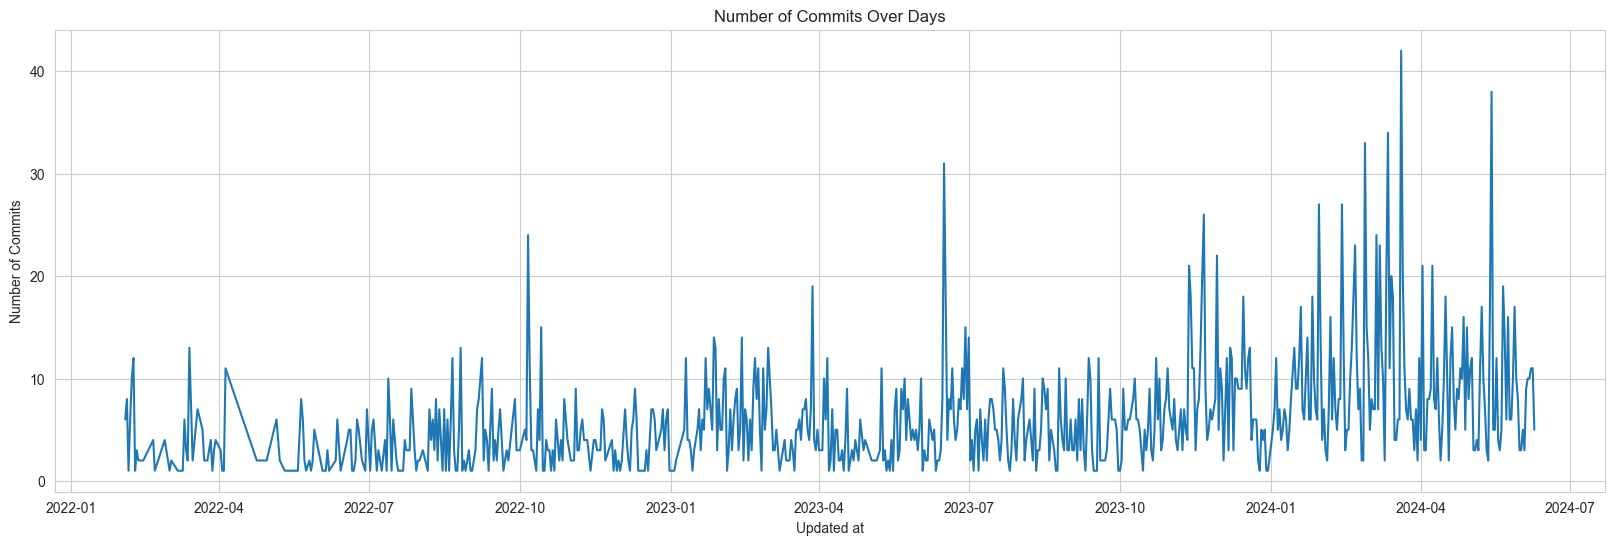

In [8]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=commit_counts, x='Updated at', y='Commit count')
plt.title("Number of Commits Over Days")
plt.xlabel('Updated at')
plt.ylabel("Number of Commits")
plt.show()

In [9]:
commit_counts = df.groupby(df['Updated at'].dt.date).size().reset_index(name='Commit count')
commit_counts['Updated at'] = pd.to_datetime(commit_counts['Updated at'])
commit_counts.set_index('Updated at', inplace=True)
weekly_commits = commit_counts.resample('W').sum()
monthly_commits = commit_counts.resample('M').sum()
yearly_commits = commit_counts.resample('A').sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\3587167547.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_commits = commit_counts.resample('M').sum()
C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\3587167547.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_commits = commit_counts.resample('A').sum()


Biểu đồ số lượng commit theo tuần, tháng, năm

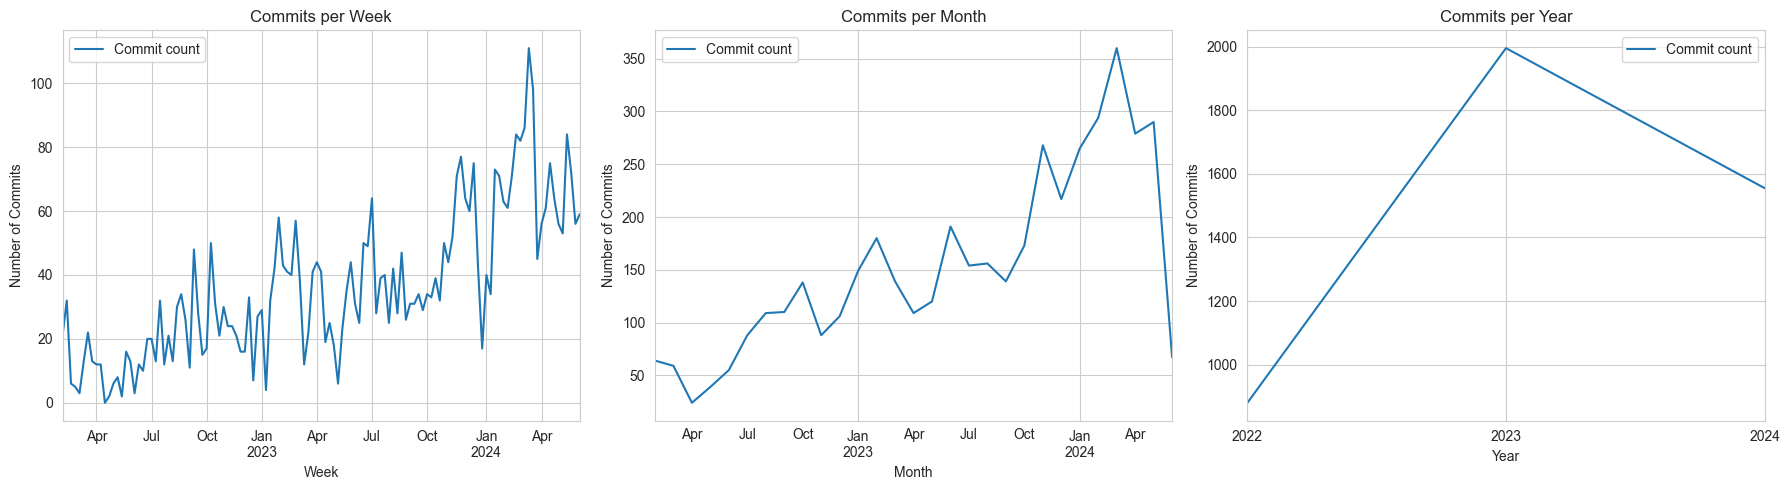

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  
weekly_commits.plot(ax=axes[0])
axes[0].set_title('Commits per Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Number of Commits')
axes[0].grid(True)
monthly_commits.plot(ax=axes[1])
axes[1].set_title('Commits per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Commits')
axes[1].grid(True)
yearly_commits.plot(ax=axes[2])
axes[2].set_title('Commits per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Commits')
axes[2].grid(True)
plt.tight_layout()  
plt.show()


In [11]:
sns.set_palette('pastel')

Dạng Barplot của biểu đồ trên

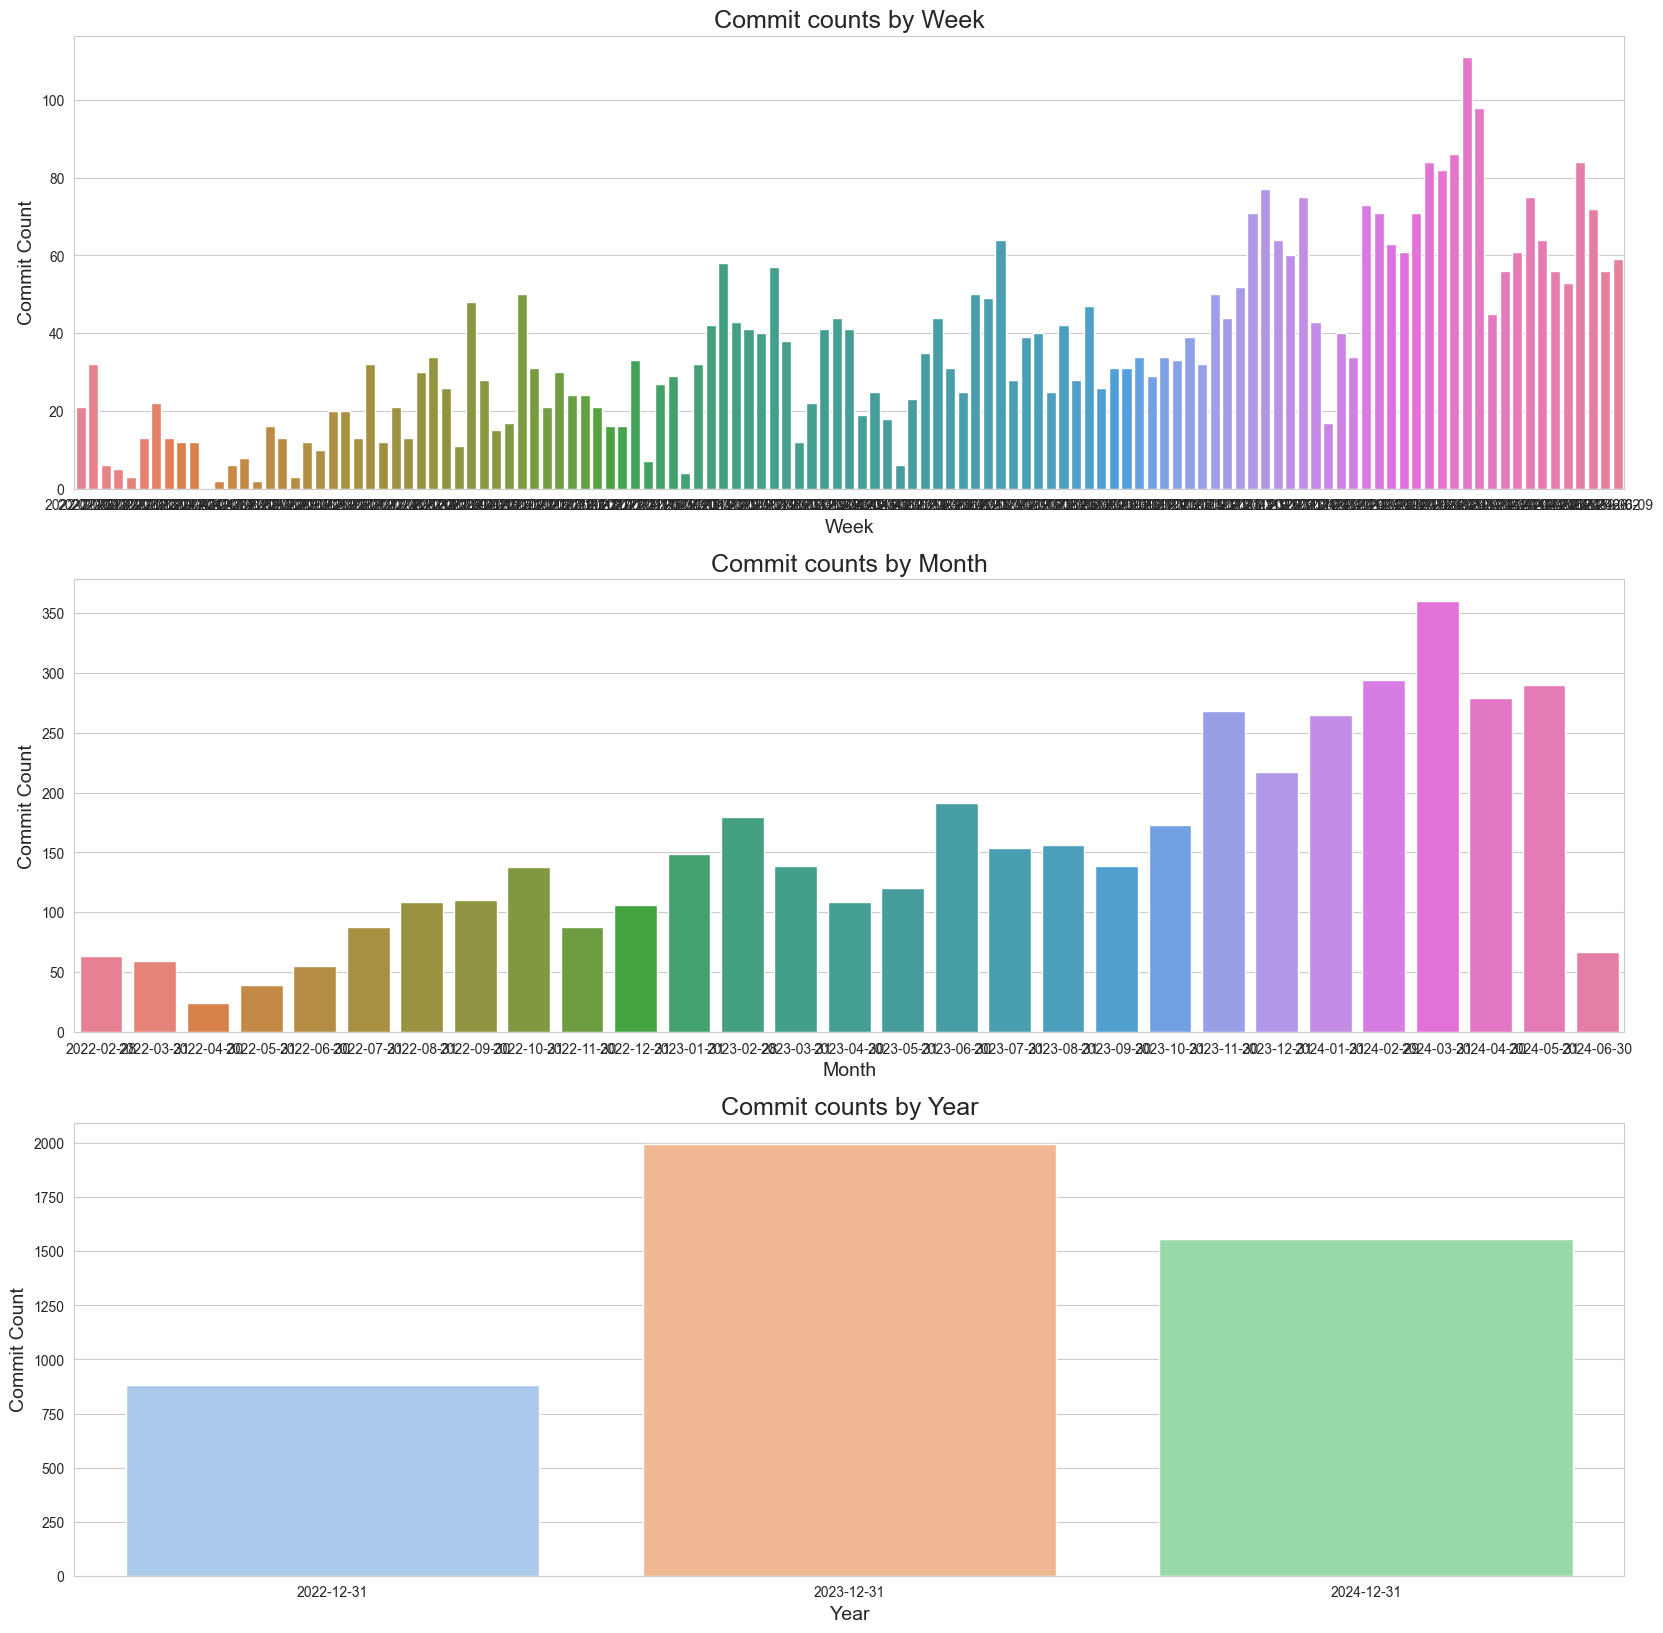

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
sns.barplot(data = weekly_commits,x=weekly_commits.index,y='Commit count', ax=axes[0], hue='Updated at')
axes[0].set_xlabel('Week',fontsize = 14)
axes[0].set_ylabel('Commit Count', fontsize = 14)
axes[0].set_title('Commit counts by Week', fontsize = 18)
sns.barplot(data = monthly_commits,x=monthly_commits.index,y='Commit count', ax=axes[1], hue = 'Updated at')
axes[1].set_xlabel('Month',fontsize = 14)
axes[1].set_ylabel('Commit Count', fontsize = 14)
axes[1].set_title('Commit counts by Month', fontsize = 18)
sns.barplot(data = yearly_commits,x=yearly_commits.index,y='Commit count', ax=axes[2], hue = 'Updated at')
axes[2].set_xlabel('Year', fontsize = 14)
axes[2].set_ylabel('Commit Count',fontsize = 14)
axes[2].set_title('Commit counts by Year', fontsize = 18)
plt.show()

Biểu đồ mật độ commit

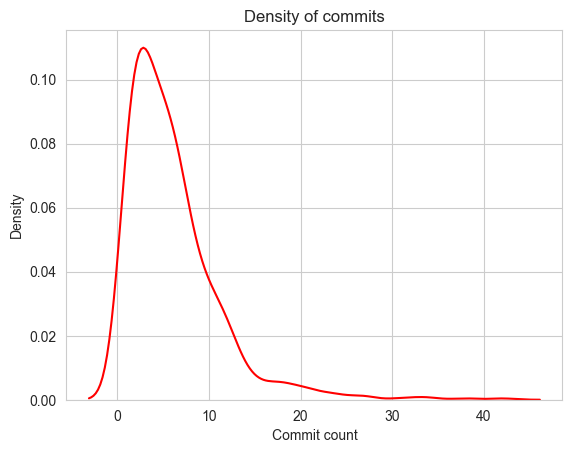

In [13]:
sns.kdeplot(data = commit_counts['Commit count'], color = 'red')
plt.title("Density of commits")
plt.show()

Biểu đồ thống kê số lượng commit

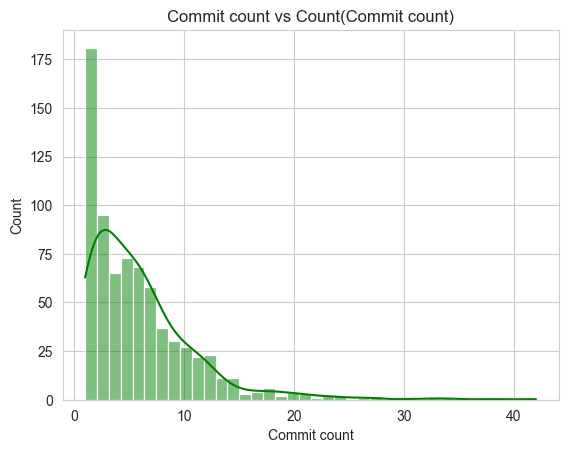

In [14]:
sns.histplot(commit_counts['Commit count'], color = 'green', kde=True)
plt.title("Commit count vs Count(Commit count)")
plt.show()

Text(0.5, 1.0, 'The number of commits by year')

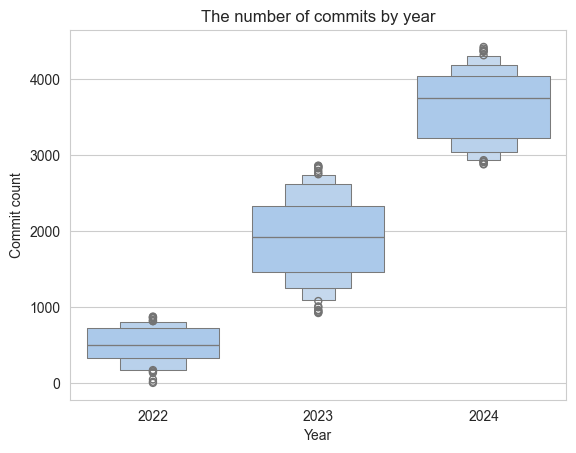

In [15]:
sns.boxenplot(data = df_commit_contrib, x='Year', y ='Commit count')
plt.title('The number of commits by year')

Biểu đồ số lượng commit bởi contributor

C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\1170732898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Contributor', order=df['Contributor'].value_counts().head(20).index, palette=colors)


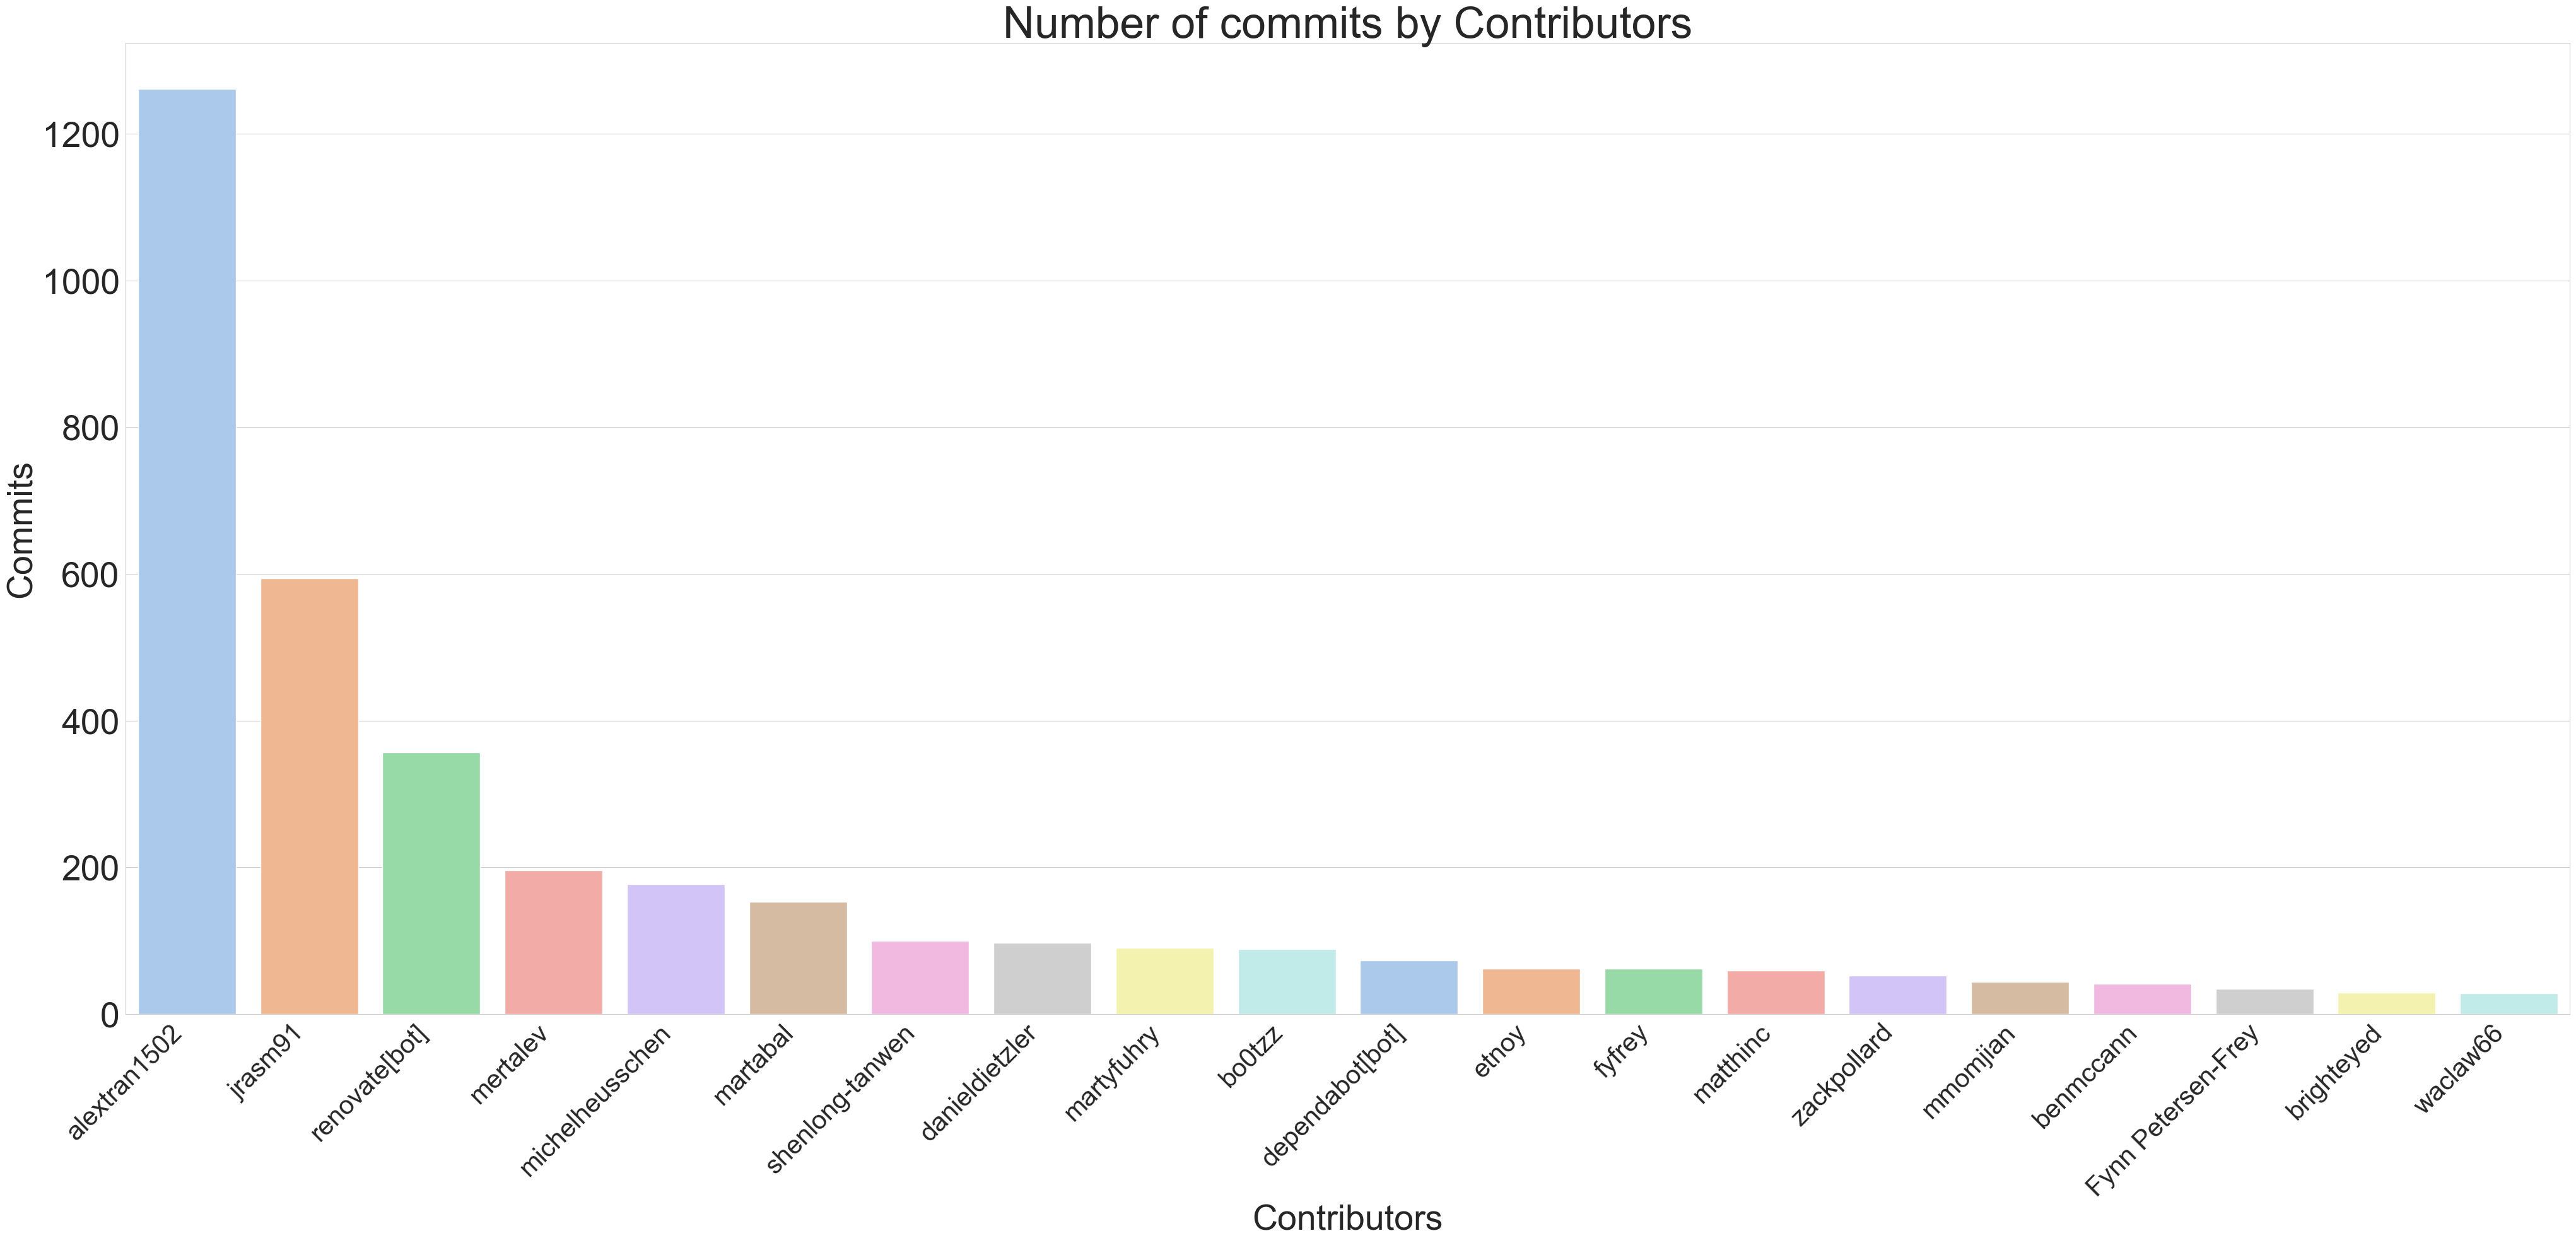

In [16]:
plt.figure(figsize=(50, 20))
colors = sns.color_palette("pastel", len(df['Contributor'].value_counts().head(20))) 
sns.countplot(data=df, x='Contributor', order=df['Contributor'].value_counts().head(20).index, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=30) 
plt.yticks(fontsize=40) 
plt.xlabel('Contributors', fontsize=40)
plt.ylabel('Commits', fontsize=40) 
plt.title('Number of commits by Contributors', fontsize = 50)
plt.show()

Biểu đồ về additions và commits

In [17]:
df_temp = df.groupby('Contributor').agg({
    'Additions': 'sum'
})


In [18]:
df_temp = df_temp.sort_values('Additions', ascending=False)
df_temp = df_temp.head(20)
df_temp = df_temp.reset_index('Contributor')

In [19]:
df_temp

Contributor  Additions
0         alextran1502     348373
1              jrasm91     186926
2             mertalev      55346
3                etnoy      45546
4            benmccann      32246
5        renovate[bot]      31227
6             martabal      29963
7      shenlong-tanwen      29086
8              weblate      25805
9       danieldietzler      23259
10      debricked[bot]      22007
11     michelheusschen      19390
12  Fynn Petersen-Frey      17474
13          martyfuhry      17363
14               jbaez      17122
15              fyfrey      16583
16            hitech95      11668
17            matthinc       8779
18         zackpollard       6452
19          brighteyed       6313

Text(0.5, 1.0, 'Number of additions by contributor')

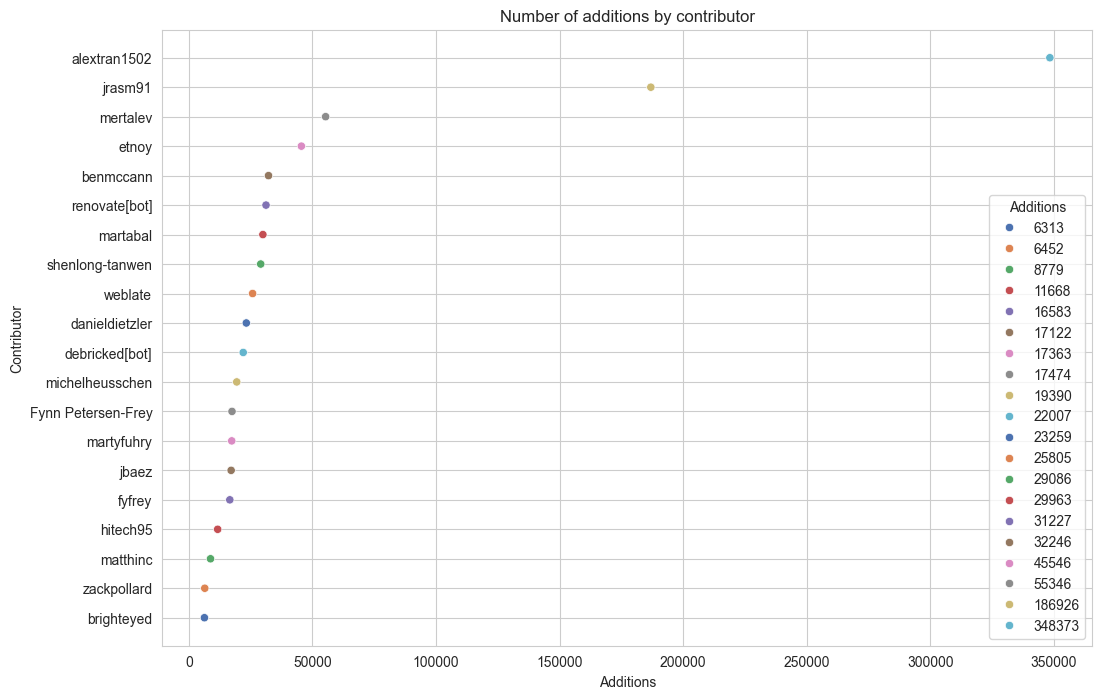

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_temp, x='Additions', y='Contributor',hue='Additions',legend = 'full',palette='deep')
plt.title('Number of additions by contributor')

In [21]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
time_activity = df.groupby('Contributor')['Updated at'].agg(['min', 'max'])
commit_contrib = df['Contributor'].value_counts()
commit_contrib.reset_index('Contributor')
time_activity = pd.merge(time_activity, commit_contrib, on="Contributor", how="inner")
time_activity = time_activity.reset_index('Contributor')

In [22]:
df_temp = pd.DataFrame()
df_temp['Contributor'] = time_activity['Contributor']
df_temp['Date'] = time_activity['min'].dt.date
df_temp = df_temp.reset_index(drop = True)
df_temp = df_temp.value_counts('Date', ascending=True)
df_temp = pd.DataFrame(df_temp)
df_temp = df_temp.rename(columns = {'count':'Number of contributor'})
df_temp = df_temp.reset_index('Date')
df_temp['Month'] = pd.to_datetime(df_temp['Date']).dt.strftime('%m-%Y')
df_temp['Year']= pd.to_datetime(df_temp['Date']).dt.strftime('%Y')


Biểu đồ số lượng tăng contributor theo thời gian

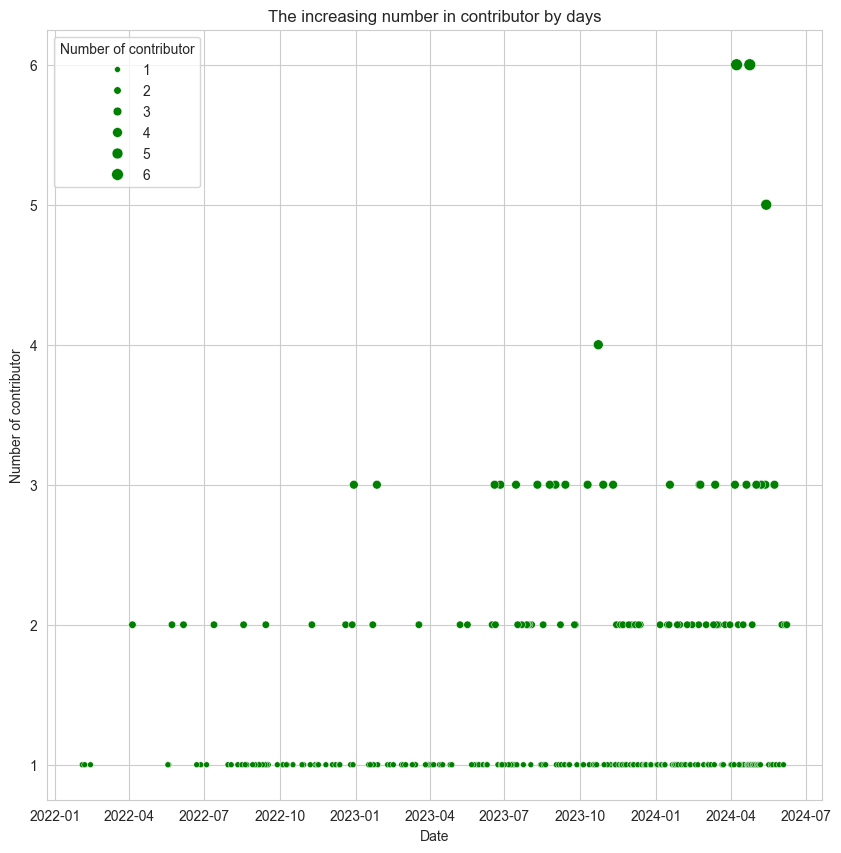

In [23]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data=df_temp, x = 'Date', y = 'Number of contributor', color = 'g', size = 'Number of contributor' )
plt.title('The increasing number in contributor by days')
plt.show()

Biểu đồ số lượng tăng contributor theo tháng

Text(0.5, 1.0, 'The increasing number in contributor by month')

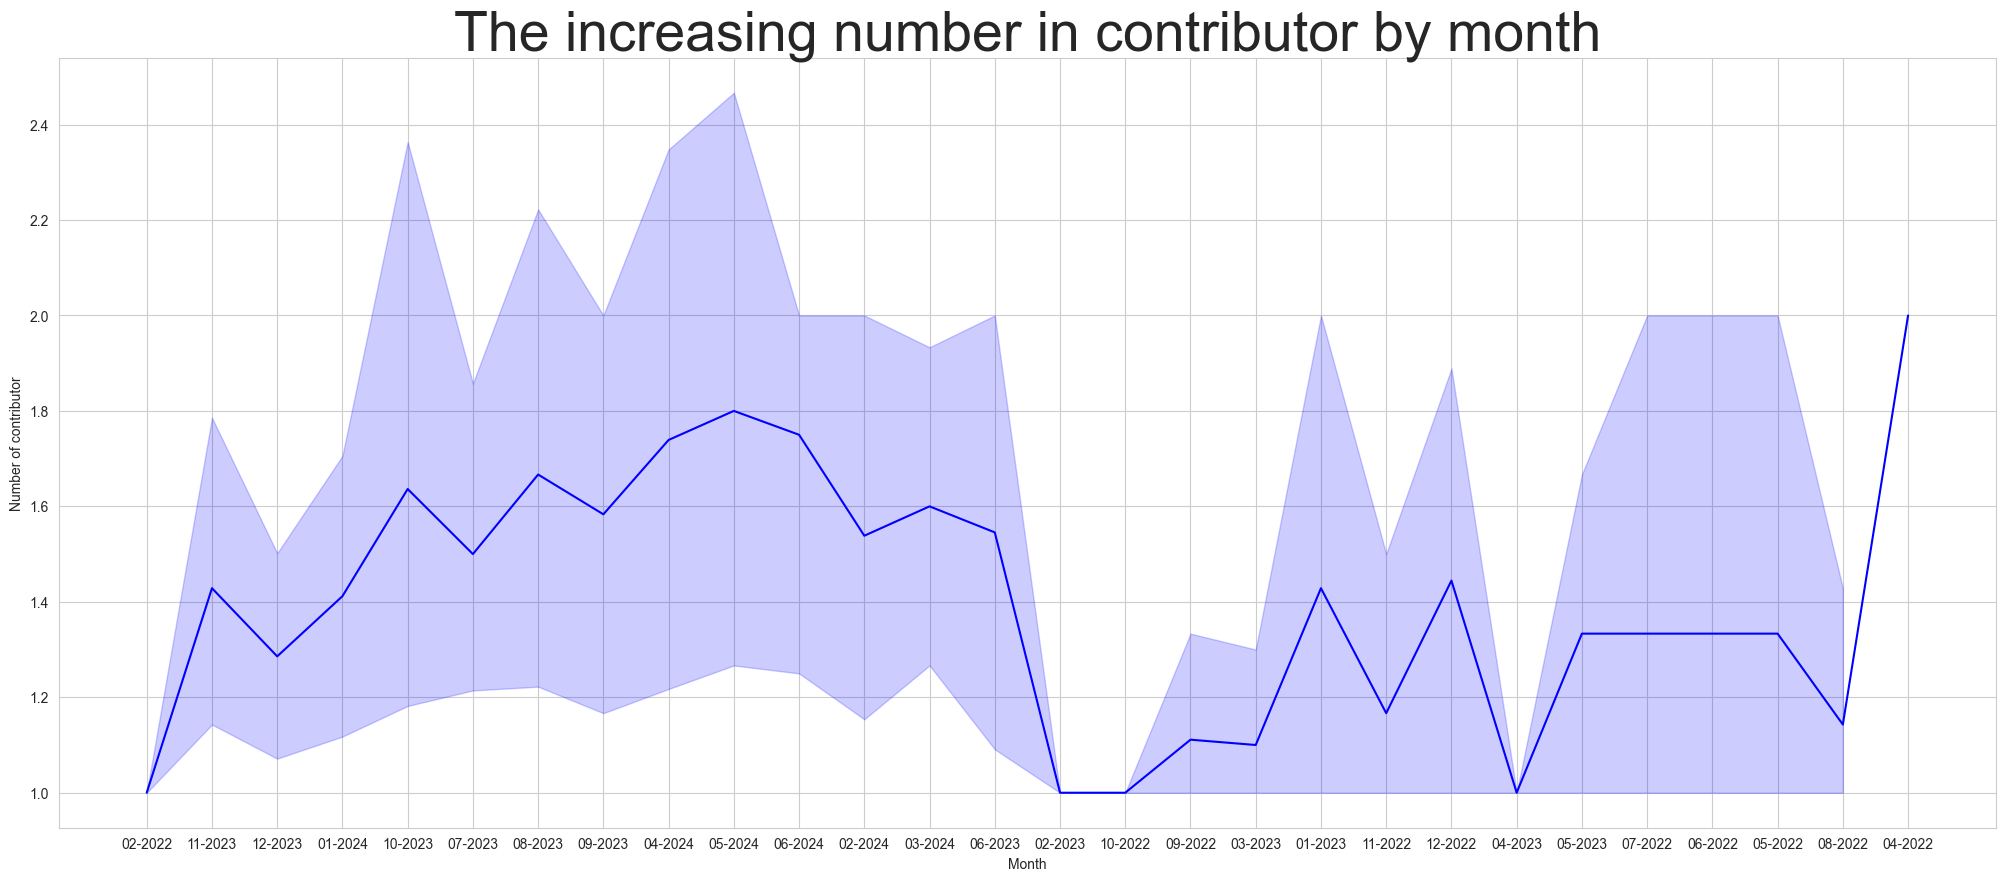

In [24]:
plt.figure(figsize = (25, 10))
sns.lineplot(data = df_temp, x = 'Month', y = 'Number of contributor', color='blue')
plt.title('The increasing number in contributor by month', fontsize=40)

In [25]:
df_commit_contrib

Date  Commit count  Number of contributor    Month  Year
0    2022-02-03             6                      1  02-2022  2022
1    2022-02-06            21                      2  02-2022  2022
2    2022-02-13            53                      3  02-2022  2022
3    2022-04-05           139                      5  04-2022  2022
4    2022-05-18           158                      6  05-2022  2022
..          ...           ...                    ...      ...   ...
254  2024-05-30          4360                    367  05-2024  2024
255  2024-06-02          4371                    369  06-2024  2024
256  2024-06-04          4383                    370  06-2024  2024
257  2024-06-06          4403                    372  06-2024  2024
258  2024-06-08          4425                    374  06-2024  2024

[259 rows x 5 columns]

Biểu đồ mối liên hệ giữa số lượng contributor và commit theo năm

Text(0.5, 1.05, 'Number of contributor and commit by years')

<Figure size 1000x1000 with 0 Axes>

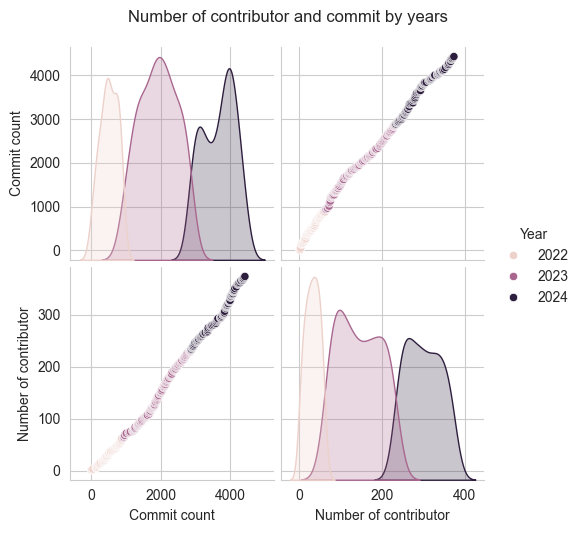

In [26]:
plt.figure(figsize = (10, 10))
sns.pairplot(data = df_commit_contrib, hue = 'Year')
plt.suptitle('Number of contributor and commit by years', y=1.05)

In [27]:
sns.set_palette('pastel')

Biểu đồ số lượng contributor qua các năm

Text(0.5, 1.0, 'Number of contributor over years')

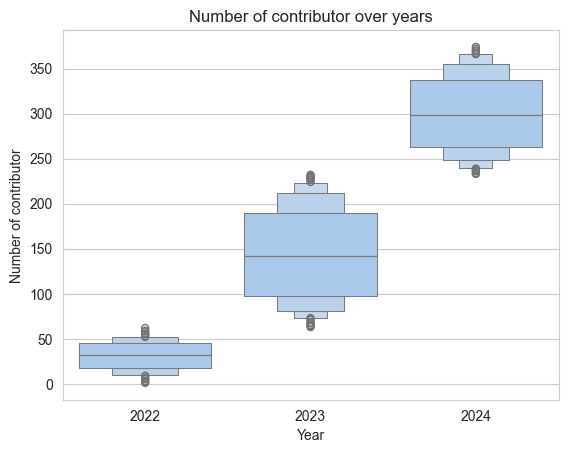

In [28]:
sns.boxenplot(data = df_commit_contrib, x='Year', y ='Number of contributor')
plt.title('Number of contributor over years')

In [29]:
df_commit_contrib

Date  Commit count  Number of contributor    Month  Year
0    2022-02-03             6                      1  02-2022  2022
1    2022-02-06            21                      2  02-2022  2022
2    2022-02-13            53                      3  02-2022  2022
3    2022-04-05           139                      5  04-2022  2022
4    2022-05-18           158                      6  05-2022  2022
..          ...           ...                    ...      ...   ...
254  2024-05-30          4360                    367  05-2024  2024
255  2024-06-02          4371                    369  06-2024  2024
256  2024-06-04          4383                    370  06-2024  2024
257  2024-06-06          4403                    372  06-2024  2024
258  2024-06-08          4425                    374  06-2024  2024

[259 rows x 5 columns]

Biểu đồ số lượng files mà các contributor đã thay đổi

In [30]:
df_temp = df.copy()

In [31]:
df_temp = df_temp.groupby('Contributor').agg({
    'Files_changed_count':'sum'
})
df_temp= df_temp.reset_index('Contributor')

In [32]:
df_temp = df_temp.sort_values('Files_changed_count', ascending=False).head(15)

Biểu đồ số lượng file thay đổi của các contributor

Text(0.5, 1.0, 'The number of files changed by contributor')

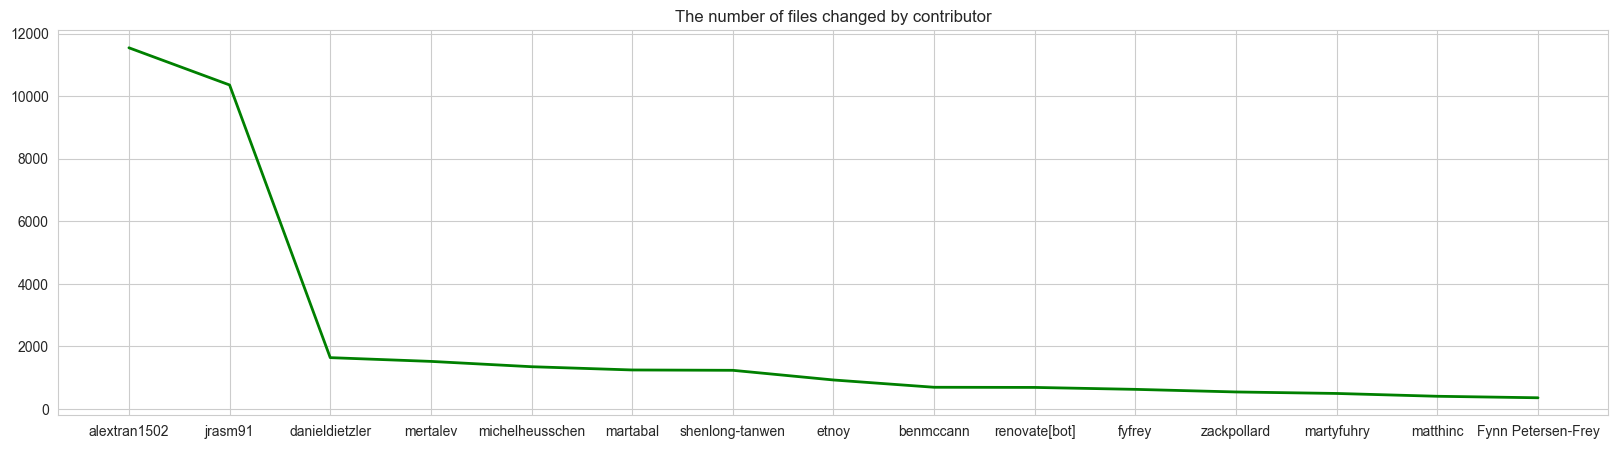

In [33]:
fig,ax=plt.subplots(figsize=(20,5))
ax.plot(df_temp['Contributor'], df_temp['Files_changed_count'], color = 'green',linewidth=2)
plt.title('The number of files changed by contributor')

In [34]:
commit_count = pd.DataFrame()
commit_count['Commit count'] = df['Contributor'].value_counts().head(10)
commit_count = commit_count.reset_index(names = 'Contributor')
total_commits = commit_count['Commit count'].sum()
others_commits = df.shape[0] - total_commits
new_row = pd.DataFrame({'Contributor': 'others', 
                        'Commit count': [others_commits],
                        })
commit_count = pd.concat([commit_count, new_row], ignore_index=True)

In [35]:
sns.set_palette('pastel')

Biểu đồ sự đóng góp theo số lượng commit của các contributor

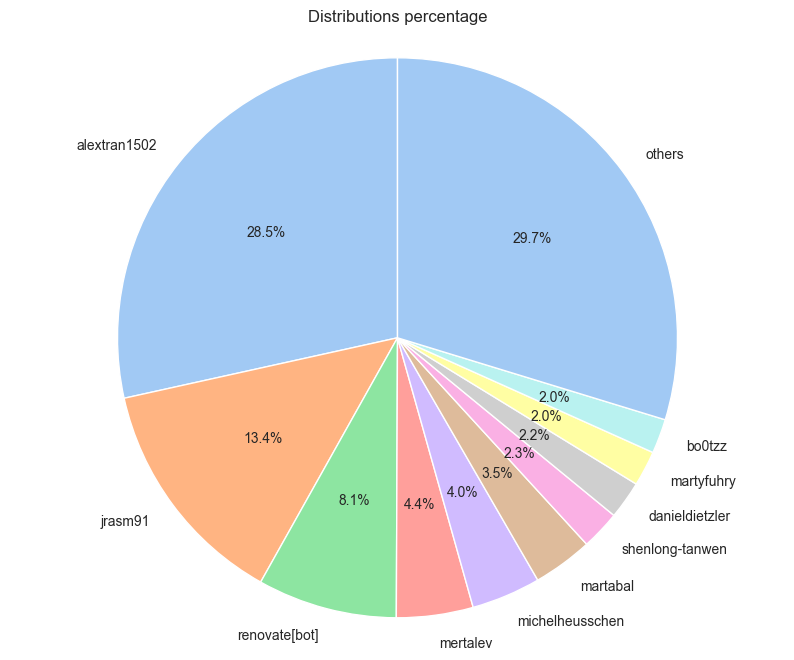

In [36]:
fig, ax = plt.subplots(figsize =(10, 8))
ax.pie(commit_count['Commit count'], labels = commit_count['Contributor'], autopct = '%1.1f%%', startangle = 90)
ax.axis('equal')
ax.set_title('Distributions percentage')
plt.show()

Số lượng pull request và commit

In [37]:
pr_df['Date'] = pd.to_datetime(pr_df['Updated_at']).dt.strftime('%d-%m-%Y')
df_temp['Commit count'] = pr_df['Commits']

In [38]:
result = pr_df.groupby('Date').agg(
    pull_request_count = ('Updated_at', 'size'),
    total_commit_count = ('Commits', 'sum')
)

In [39]:
result = result.sort_values('Date', ascending=True)

Text(0.5, 0.98, 'Commit count vs Pull request')

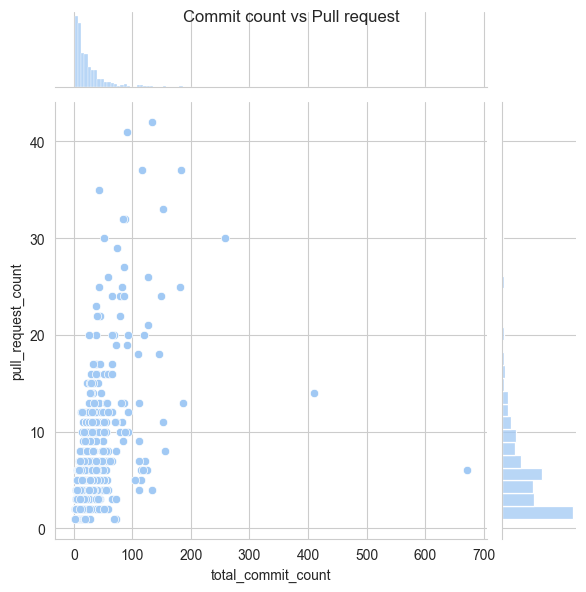

In [40]:
sns.jointplot(data = result, y= 'pull_request_count',x = 'total_commit_count' )
plt.suptitle('Commit count vs Pull request')

In [41]:
pr_df[(pr_df['Merged_at'].isnull()) & (pr_df['Pr_state'] == 'closed')]

Author     Reviewer Pr_state           Created_at  \
48    dependabot[bot]          NaN   closed  2022-04-28 10:30:31   
49           chasx003          NaN   closed  2022-04-28 13:19:14   
52        EnricoBilla  EnricoBilla   closed  2022-04-30 21:04:15   
60       alextran1502          NaN   closed  2022-05-08 13:14:21   
62         xpwmaosldk          NaN   closed  2022-05-11 02:20:58   
...               ...          ...      ...                  ...   
4328     alextran1502          NaN   closed  2024-06-09 12:43:02   
4330       roschaefer          NaN   closed  2024-06-09 17:43:42   
4354    renovate[bot]          NaN   closed  2024-06-11 04:27:41   
4379     alextran1502          NaN   closed  2024-06-11 16:42:27   
4397     alextran1502          NaN   closed  2024-06-12 14:08:36   

               Updated_at  Additions  Commits Merged_at        Date  
48    2022-05-06 10:28:06          4        1       NaN  06-05-2022  
49    2022-05-23 22:24:19         20        4       NaN  23-05-2022  
52    2022-05-03 07:00:32        222        7       NaN  03-05-2022  
60    2022-05-11 05:15:15          1        1       NaN  11-05-2022  
62    2022-05-12 13:01:26         86        2       NaN  12-05-2022  
...                   ...        ...      ...       ...         ...  
4328  2024-06-10 16:11:05      24461       44       NaN  10-06-2024  
4330  2024-06-09 19:48:47          3        1       NaN  09-06-2024  
4354  2024-06-12 16:01:53         19        1       NaN  12-06-2024  
4379  2024-06-12 10:39:17          1        1       NaN  12-06-2024  
4397  2024-06-12 15:29:34          8        3       NaN  12-06-2024  

[514 rows x 9 columns]

In [42]:
pr_df['Rejected'] = (pr_df['Merged_at'].isnull() )& (pr_df['Pr_state'] =='closed')

Biểu đồ tương quan giữa số lượng additions, commits và thành phần rejected

Text(0.5, 1.0, 'Additions-Commits-Rejected')

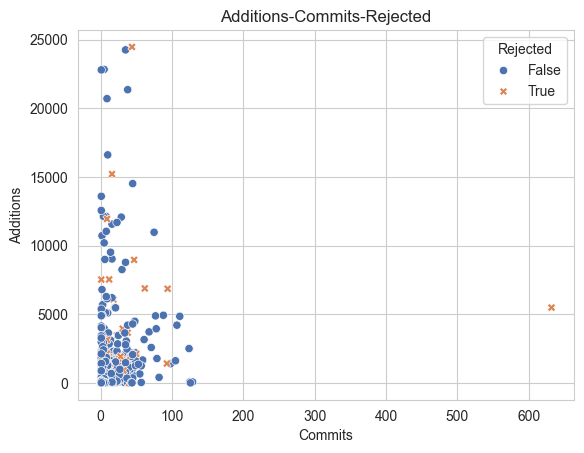

In [43]:
g = sns.scatterplot(data=pr_df, x='Commits', y='Additions', hue='Rejected', style = 'Rejected', palette='deep')
plt.title('Additions-Commits-Rejected')

In [44]:
total_lines = language_df['lines'].sum()
language_df['percentage(%)'] = language_df['lines']*100/total_lines

In [45]:
df_temp = language_df[language_df['percentage(%)'] > 2]
others_pc = 100-df_temp['percentage(%)'].sum()
other_lines = total_lines - df_temp['lines'].sum()
new_row = pd.DataFrame({'language':'Others',
                        'lines': [other_lines],
                        'percentage(%)':[others_pc]})
df_temp = pd.concat([df_temp, new_row], ignore_index=True)

Biểu đồ phần trăm các ngôn ngữ được sử dụng trong repo

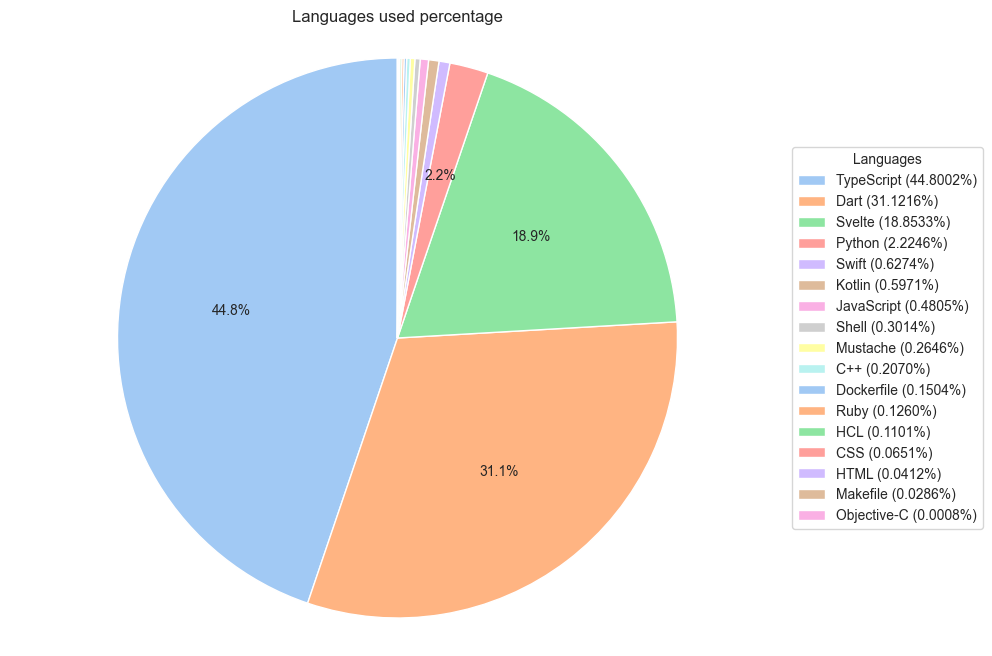

In [46]:

fig, ax = plt.subplots(figsize =(10, 8))
wedges, texts, autotexts = ax.pie(language_df['lines'], autopct=lambda p: '{:.1f}%'.format(p) if p > 2 else '',startangle = 90)
ax.axis('equal')
ax.set_title('Languages used percentage')
legend_labels = [ '{} ({:.4f}%)'.format(lang, 100 * val / sum(language_df['lines'])) for lang, val in zip(language_df['language'], language_df['lines'])]
ax.legend(wedges, legend_labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [47]:
language_df

language    lines  percentage(%)
0    TypeScript  2128711      44.800170
1          Dart  1478766      31.121636
2        Svelte   895829      18.853330
3        Python   105702       2.224570
4         Swift    29812       0.627414
5        Kotlin    28373       0.597129
6    JavaScript    22833       0.480536
7         Shell    14322       0.301416
8      Mustache    12571       0.264565
9           C++     9834       0.206963
10   Dockerfile     7148       0.150435
11         Ruby     5989       0.126043
12          HCL     5231       0.110090
13          CSS     3091       0.065052
14         HTML     1958       0.041207
15     Makefile     1361       0.028643
16  Objective-C       38       0.000800

Biểu đồ số dòng mà các ngôn ngữ được dùng

Text(0.5, 1.0, 'The number of lines of the languages')

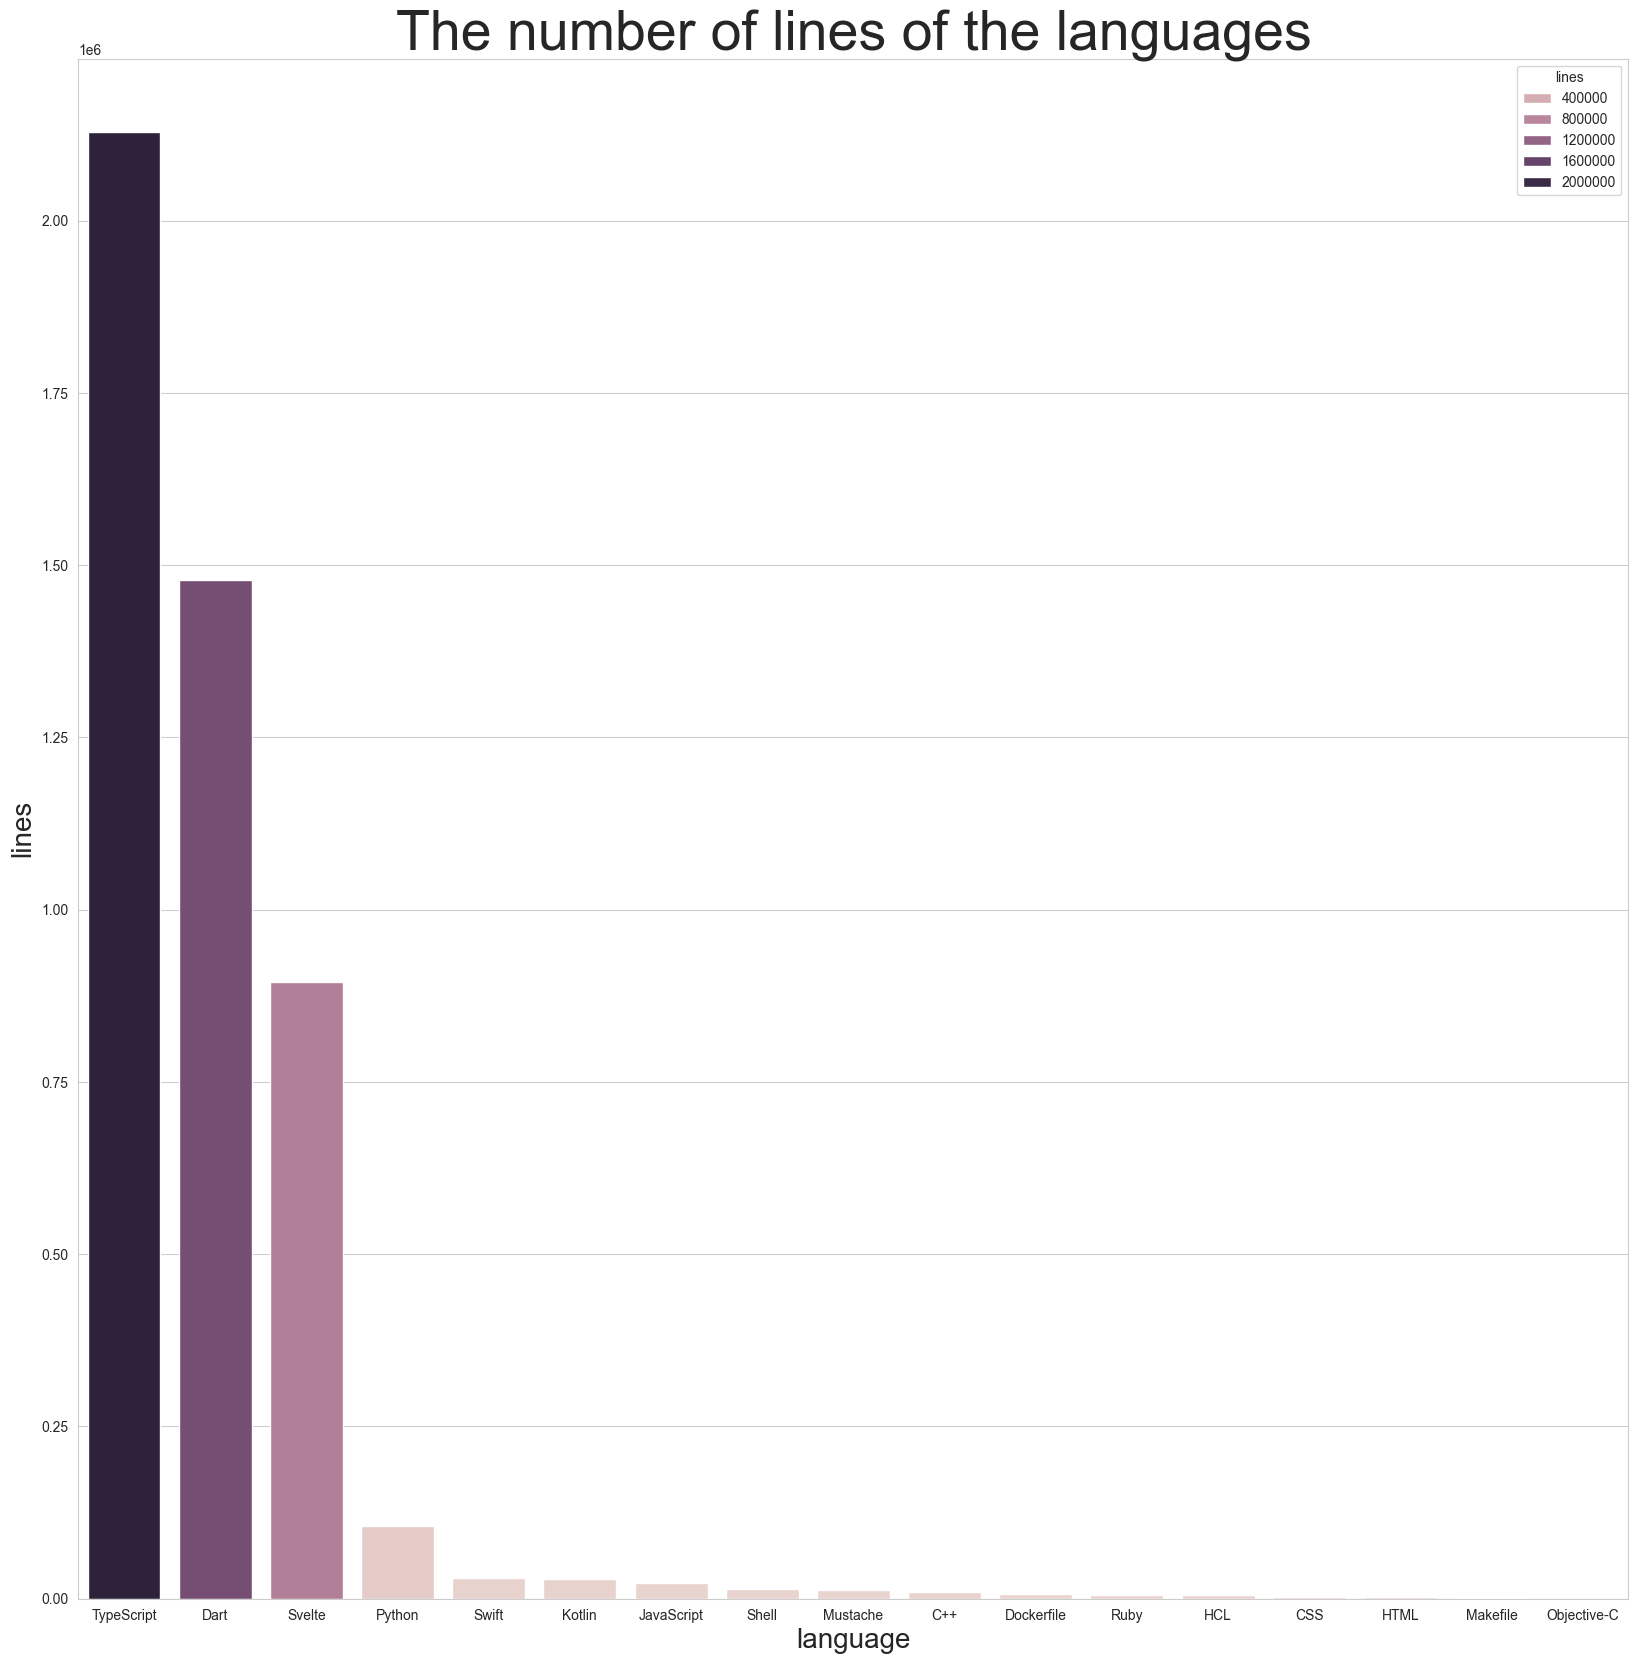

In [48]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(data = language_df,x='language',y='lines', ax=ax, hue='lines')
ax.set_xlabel('language',fontsize = 20)
ax.set_ylabel('lines', fontsize = 20)
ax.set_title('The number of lines of the languages', fontsize = 40)

In [49]:
df_temp = pr_df.groupby('Author').size()
df_temp = df_temp.reset_index(name =  'Prs')
df_temp = df_temp.sort_values('Prs', ascending=False)
df_temp = df_temp.head(10)

Biểu đồ số lượng pull request được tạo bởi contributor

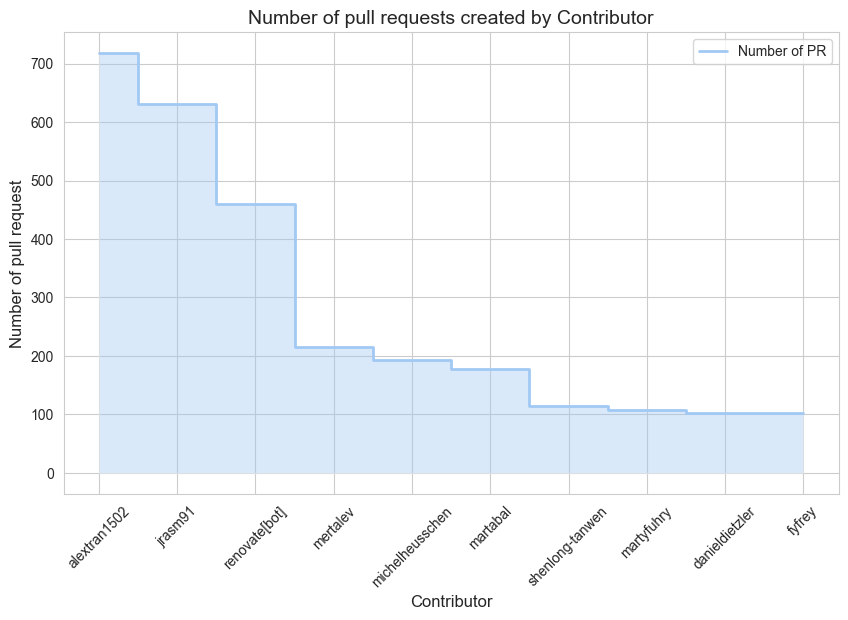

In [50]:
plt.figure(figsize=(10, 6))
plt.step(df_temp['Author'], df_temp['Prs'], where='mid', label='Number of PR', linewidth=2)
plt.fill_between(df_temp['Author'], df_temp['Prs'], step='mid', alpha=0.4)
plt.title('Number of pull requests created by Contributor', fontsize=14)
plt.xlabel('Contributor', fontsize=12)
plt.ylabel('Number of pull request', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [51]:
pr_df['Created_at'] = pd.to_datetime(pr_df['Created_at'])
df_temp = pr_df.groupby(pr_df['Created_at'].dt.date).size()
df_temp = df_temp.reset_index(name = 'Prs')
df_temp

Created_at  Prs
0    2022-02-06    2
1    2022-02-07    1
2    2022-02-08    2
3    2022-02-09    1
4    2022-02-10    1
..          ...  ...
744  2024-06-09    5
745  2024-06-10   19
746  2024-06-11   32
747  2024-06-12   24
748  2024-06-13   10

[749 rows x 2 columns]

Biểu đồ số lượng pull request qua các ngày

Text(0, 0.5, 'Number of PR')

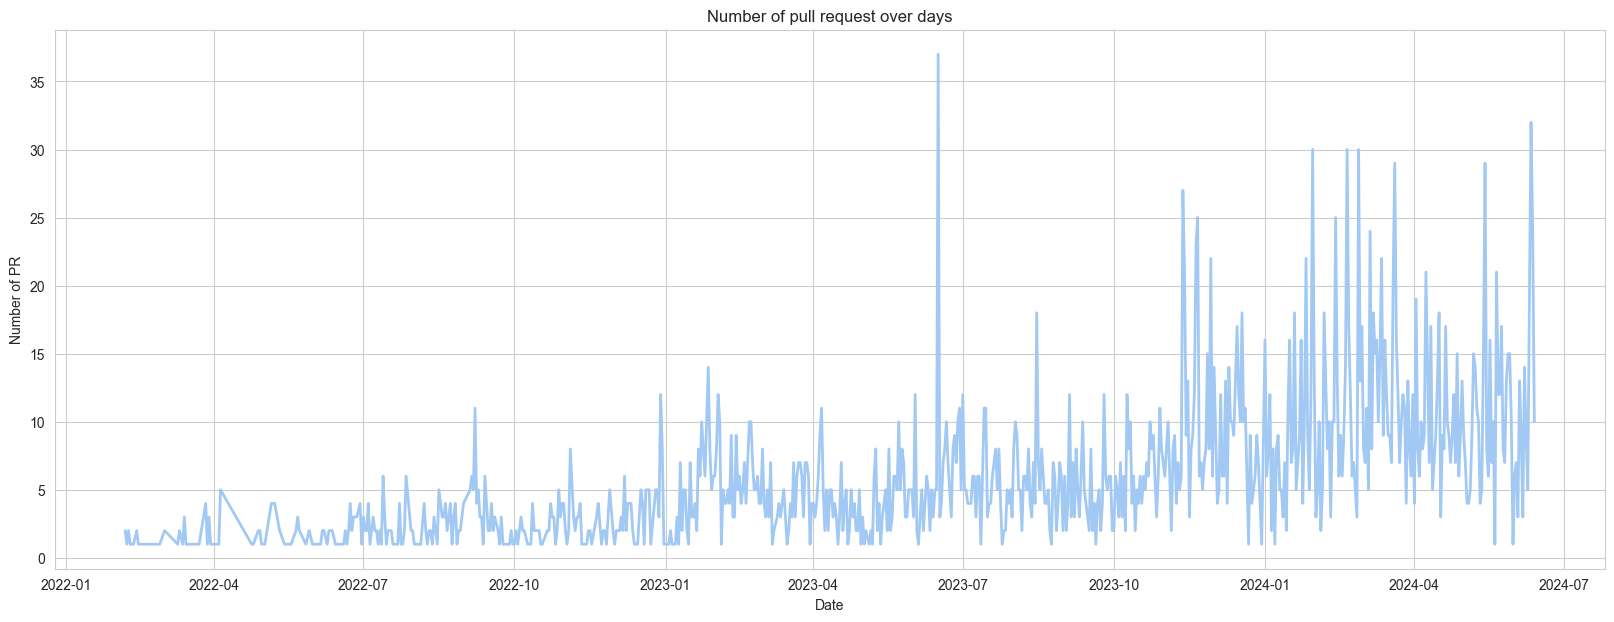

In [52]:
fig,ax=plt.subplots(figsize=(20,7))
ax.plot(df_temp['Created_at'], df_temp['Prs'], linewidth=2)
plt.title('Number of pull request over days')
plt.xlabel('Date')
plt.ylabel('Number of PR')

In [53]:
issue_df['Created_at'] = pd.to_datetime(issue_df['Created_at'])
df_temp = issue_df.groupby(issue_df['Created_at'].dt.date).size()
df_temp = df_temp.reset_index(name = 'Issues')
df_temp

Created_at  Issues
0    2022-02-05       1
1    2022-02-06       5
2    2022-02-07       1
3    2022-02-08       1
4    2022-02-09       1
..          ...     ...
710  2024-06-10       3
711  2024-06-11      32
712  2024-06-12      24
713  2024-06-13      23
714  2024-06-14      17

[715 rows x 2 columns]

In [54]:
sns.set_palette('viridis')

Biểu đồ số lượng issue qua các ngày

Text(0, 0.5, 'Number of Issue')

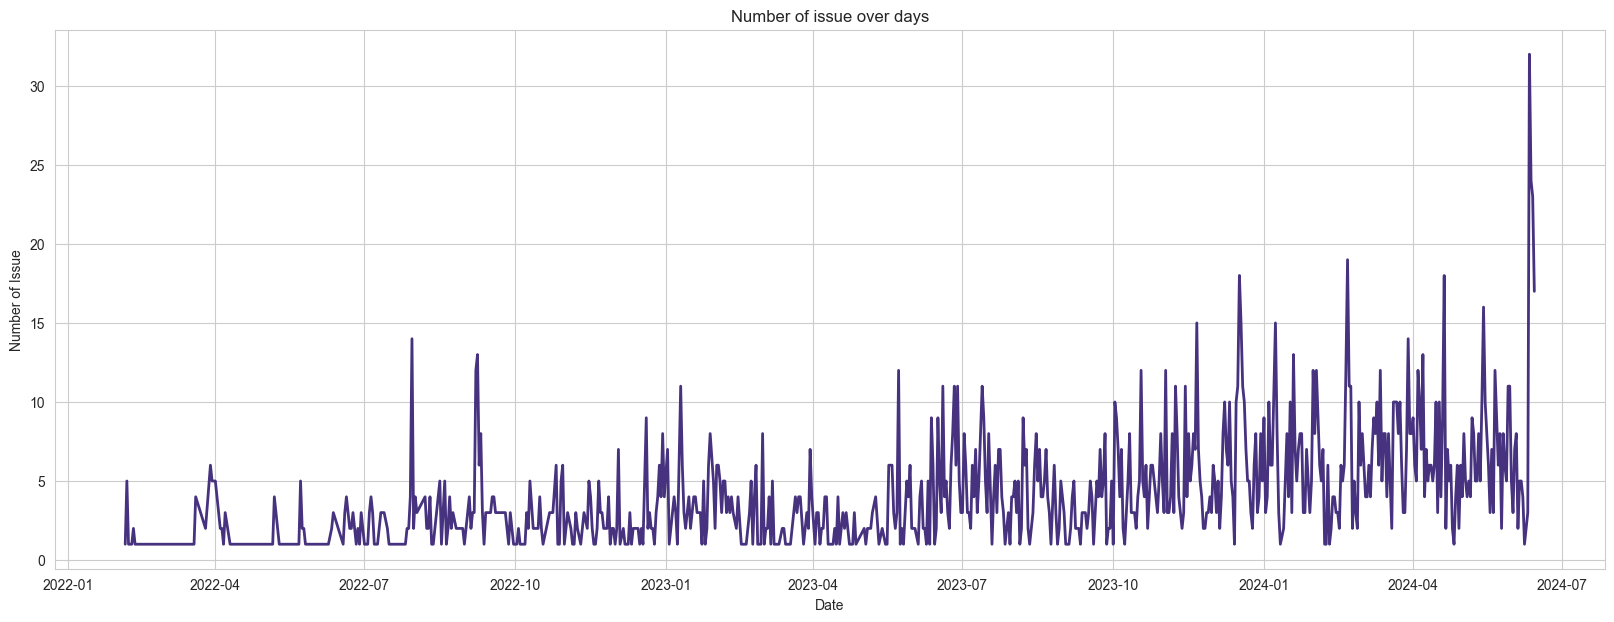

In [55]:
fig,ax=plt.subplots(figsize=(20,7))
ax.plot(df_temp['Created_at'], df_temp['Issues'],linewidth=2)
plt.title('Number of issue over days')
plt.xlabel('Date')
plt.ylabel('Number of Issue')

In [56]:
issue_df['Date'] = pd.to_datetime(issue_df['Created_at']).dt.date

In [57]:
issue_df

Author  Comment user          Created_at            Closed_at  \
0     alextran1502           NaN 2022-02-05 07:04:44  2022-02-06 06:26:15   
1     alextran1502           NaN 2022-02-06 06:37:08  2022-02-06 06:50:47   
2     alextran1502  alextran1502 2022-02-06 06:37:24  2022-02-08 03:44:44   
3     alextran1502  alextran1502 2022-02-06 06:37:29  2022-02-08 06:27:24   
4     alextran1502           NaN 2022-02-06 06:57:52  2022-02-07 02:32:09   
...            ...           ...                 ...                  ...   
3033     Mubelotix      mmomjian 2024-06-14 15:21:48  2024-06-14 15:25:11   
3034      seanmuth           NaN 2024-06-14 15:53:39  2024-06-14 15:55:07   
3035      arnar-th        bo0tzz 2024-06-14 18:32:00  2024-06-14 21:26:48   
3036  manuelcortez           NaN 2024-06-14 22:39:28                  NaN   
3037      eygraber           NaN 2024-06-14 23:52:27  2024-06-15 00:56:58   

       State           Labels         Assignees        Date  
0     closed      ['feature']  ['alextran1502']  2022-02-05  
1     closed               []                []  2022-02-06  
2     closed  ['enhancement']                []  2022-02-06  
3     closed  ['enhancement']                []  2022-02-06  
4     closed  ['enhancement']                []  2022-02-06  
...      ...              ...               ...         ...  
3033  closed               []                []  2024-06-14  
3034  closed               []                []  2024-06-14  
3035  closed               []                []  2024-06-14  
3036    open               []                []  2024-06-14  
3037  closed               []                []  2024-06-14  

[3038 rows x 8 columns]

Biểu đồ thời gian giải quyết các issue

In [58]:
issue_df['Created_at'] = pd.to_datetime(issue_df['Created_at'])
issue_df['Closed_at'] = pd.to_datetime(issue_df['Closed_at'])
issue_df['duration'] = (issue_df['Closed_at'] - issue_df['Created_at']).dt.total_seconds()
issue_df.loc[issue_df['State'] == 'open', 'duration'] = pd.NaT

C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\570179033.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NaT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  issue_df.loc[issue_df['State'] == 'open', 'duration'] = pd.NaT


In [59]:
df_temp = issue_df[issue_df['duration'].notnull()]
df_temp = df_temp.groupby('duration').size().reset_index(name='count')

In [60]:
df_temp

duration  count
0           15.0      1
1           22.0      1
2           23.0      1
3           24.0      2
4           26.0      1
...          ...    ...
2503  36058657.0      1
2504  38586659.0      1
2505  40228632.0      1
2506  42357936.0      1
2507  51046955.0      1

[2508 rows x 2 columns]

In [61]:
df_temp = issue_df.groupby('Author').size()
df_temp = df_temp.reset_index(name =  'Issues')
df_temp = df_temp.sort_values('Issues', ascending=False)
df_temp = df_temp.head(10)

In [62]:
sns.set_palette('viridis')

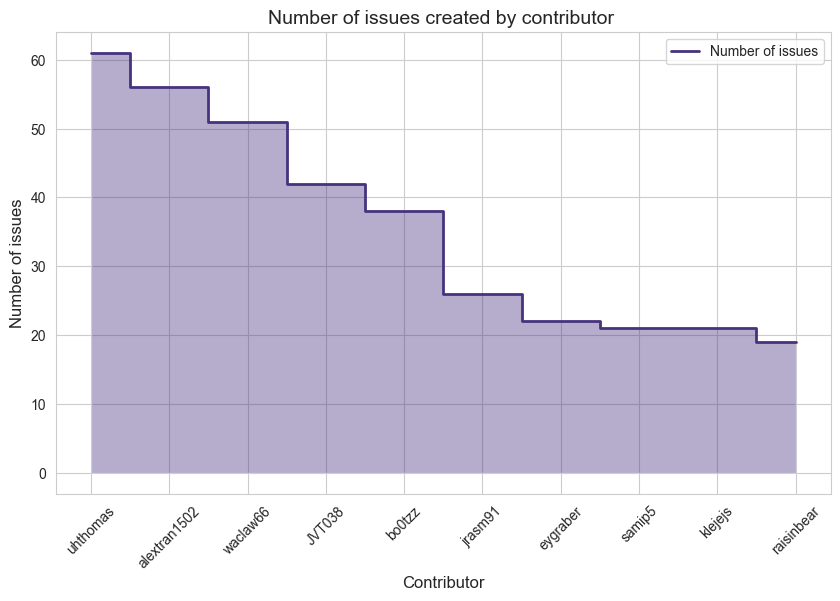

In [63]:
plt.figure(figsize=(10, 6))
plt.step(df_temp['Author'], df_temp['Issues'], where='mid', label='Number of issues', linewidth=2)
plt.fill_between(df_temp['Author'], df_temp['Issues'], step='mid', alpha=0.4)
plt.title('Number of issues created by contributor ', fontsize=14)
plt.xlabel('Contributor', fontsize=12)
plt.ylabel('Number of issues', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [64]:
df_temp

Author  Issues
1574      uhthomas      61
561   alextran1502      56
1611      waclaw66      51
216         JVT038      42
657         bo0tzz      38
1032       jrasm91      26
838       eygraber      22
1424        samip5      21
1075       klejejs      21
1378    raisinbear      19

Biểu đồ số issue được tạo bởi contributor

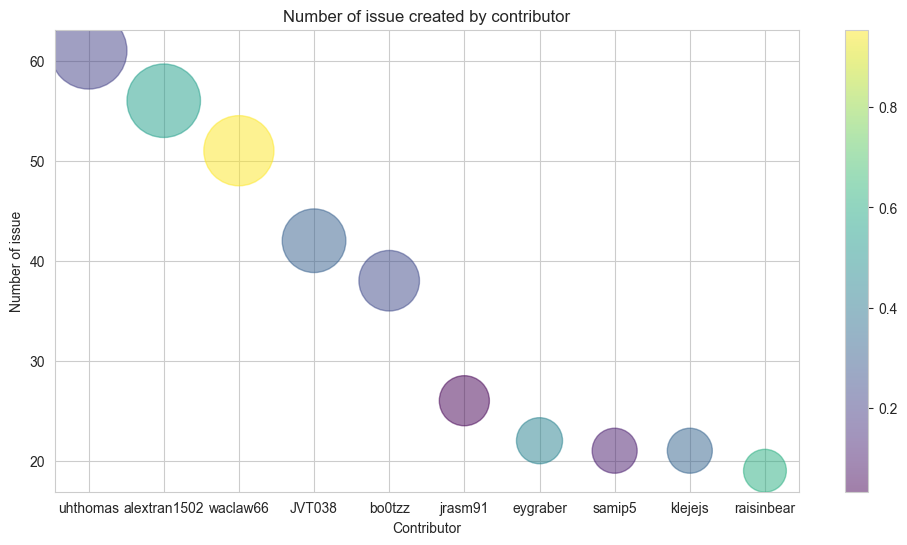

In [65]:
sizes = df_temp['Issues']*50
colors = np.random.rand(10)
plt.figure(figsize=(12, 6))
plt.scatter(df_temp['Author'], df_temp['Issues'], s=sizes, c=colors, alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title('Number of issue created by contributor')
plt.xlabel('Contributor')
plt.ylabel('Number of issue')
plt.show()


Biểu đồ tổng số lượng contributor và tổng số lượng commit theo năm

Text(0.5, 1.0, 'Total number of contributor and total number of commit')

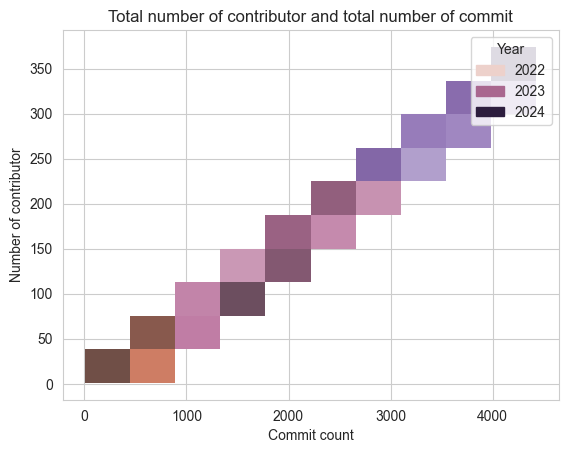

In [66]:
sns.histplot(data=df_commit_contrib,x='Commit count',y='Number of contributor', hue='Year')
plt.title('Total number of contributor and total number of commit')

In [67]:
repo_df

date    stars  forks  releases
0      2022-02-06 06:51:16      1.0    NaN       NaN
1      2022-02-06 06:57:45      2.0    NaN       NaN
2      2022-02-06 07:06:13      3.0    NaN       NaN
3      2022-02-06 07:26:44      4.0    NaN       NaN
4      2022-02-06 07:34:32      5.0    NaN       NaN
...                    ...      ...    ...       ...
38789  2024-06-15 13:39:33  37039.0    NaN       NaN
38790  2024-06-15 13:41:34  37040.0    NaN       NaN
38791  2024-06-15 13:43:36  37041.0    NaN       NaN
38792  2024-06-15 13:44:27  37042.0    NaN       NaN
38793  2024-06-15 13:51:55  37043.0    NaN       NaN

[38794 rows x 4 columns]

In [68]:
repo_df['Date'] = pd.to_datetime(repo_df['date']).dt.date

In [69]:
repo_df = repo_df.groupby('Date').last().reset_index()

In [70]:
repo_df

Date                 date    stars   forks  releases
0    2022-02-06  2022-02-06 23:51:24     97.0     2.0       2.0
1    2022-02-07  2022-02-07 23:49:42    164.0     4.0       4.0
2    2022-02-08  2022-02-08 23:31:52    194.0     NaN       NaN
3    2022-02-09  2022-02-09 20:12:56    235.0     NaN       NaN
4    2022-02-10  2022-02-10 23:12:08    250.0     5.0       5.0
..          ...                  ...      ...     ...       ...
848  2024-06-11  2024-06-11 23:29:30  35466.0  1734.0    1734.0
849  2024-06-12  2024-06-12 23:45:05  35550.0  1741.0    1741.0
850  2024-06-13  2024-06-13 23:56:42  36248.0  1772.0    1772.0
851  2024-06-14  2024-06-14 23:39:12  36969.0  1800.0    1800.0
852  2024-06-15  2024-06-15 13:51:55  37043.0  1805.0    1805.0

[853 rows x 5 columns]

Biểu đồ số lượng sao qua các ngày

Text(0, 0.5, 'Number of stars')

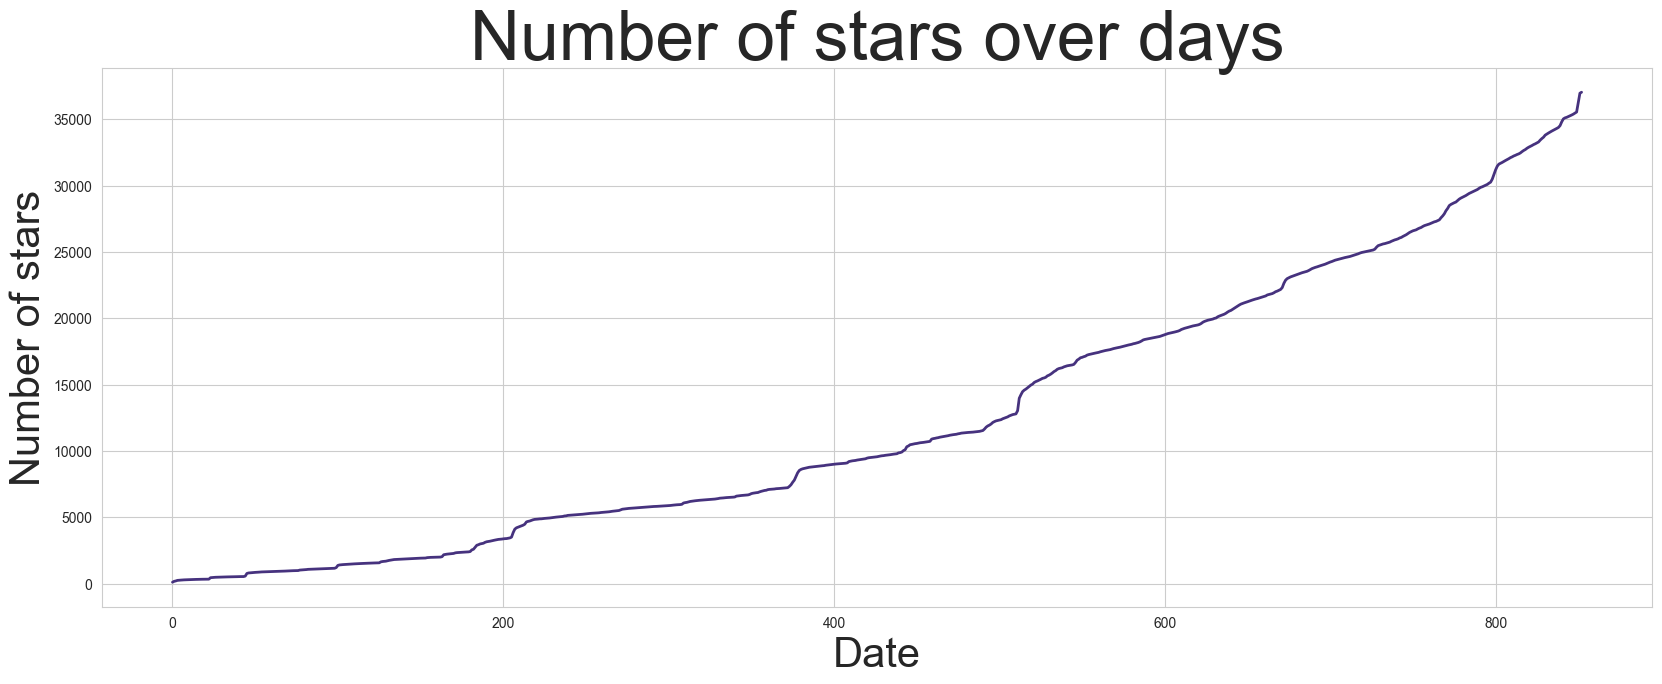

In [71]:
fig,ax=plt.subplots(figsize=(20,7))
ax.plot(repo_df.index, repo_df['stars'],linewidth=2)
plt.title('Number of stars over days', fontsize=50)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Number of stars', fontsize=30)

Số lượng sao của 1 repo đếm theo ngày

Text(0.5, 1.0, 'The number of stars of a repo counted by the number of days')

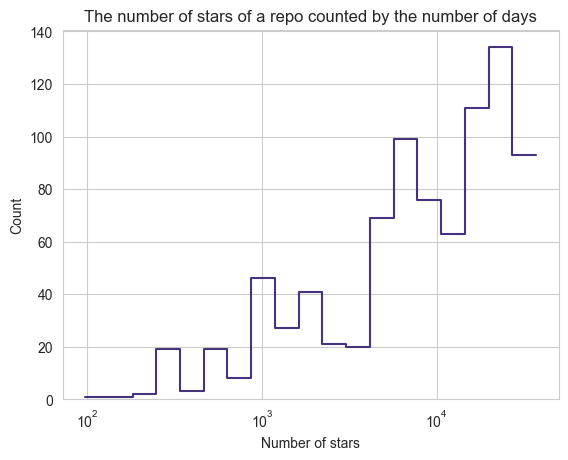

In [72]:
sns.histplot(data=repo_df, x="stars", log_scale=True, element='step',fill=False)
plt.xlabel('Number of stars')
plt.title('The number of stars of a repo counted by the number of days')

In [73]:
for i in range(1, repo_df.shape[0]):
    if pd.isna(repo_df['forks'].iloc[i]):
        repo_df['forks'].iloc[i] = repo_df['forks'].iloc[i-1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\4000724614.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  repo_df['forks'].iloc[i] = repo_df['forks'].iloc[i-1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\4000724614.py:3: SettingWi

Biểu đồ của forks qua các ngày

Text(0, 0.5, 'Number of forks')

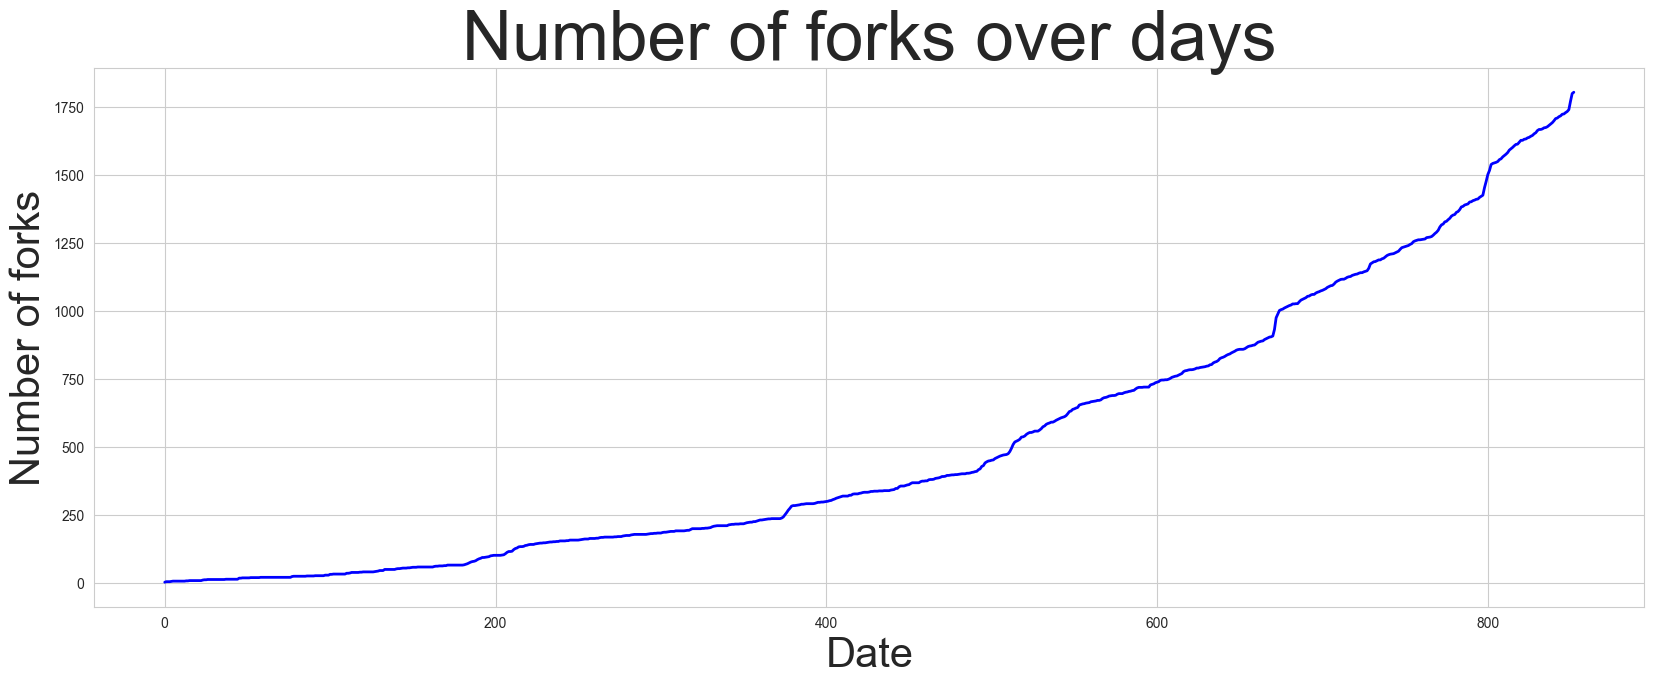

In [74]:
fig,ax=plt.subplots(figsize=(20,7))
ax.plot(repo_df.index, repo_df['forks'],color = 'blue',linewidth=2)
plt.title('Number of forks over days', fontsize=50)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Number of forks', fontsize=30)

Số lượng forks đếm theo ngày

Text(0.5, 1.0, 'The number of forks of a repo counted by the number of days')

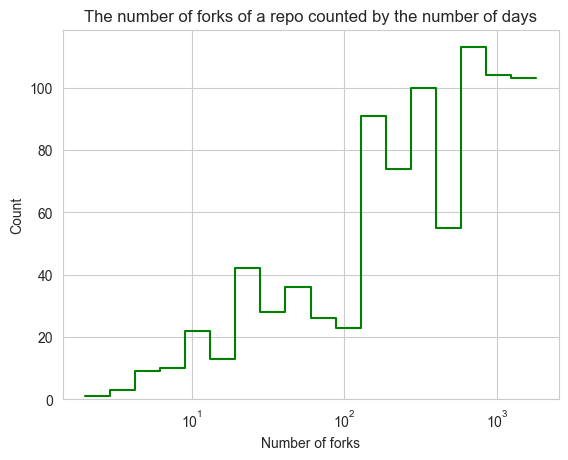

In [75]:
sns.histplot(data=repo_df, x="forks", log_scale=True, color= 'green',element='step',fill=False)
plt.xlabel('Number of forks')
plt.title('The number of forks of a repo counted by the number of days')

In [76]:
repo_df['Year'] = pd.to_datetime(repo_df['Date']).dt.strftime('%Y')
repo_df

Date                 date    stars   forks  releases  Year
0    2022-02-06  2022-02-06 23:51:24     97.0     2.0       2.0  2022
1    2022-02-07  2022-02-07 23:49:42    164.0     4.0       4.0  2022
2    2022-02-08  2022-02-08 23:31:52    194.0     4.0       NaN  2022
3    2022-02-09  2022-02-09 20:12:56    235.0     4.0       NaN  2022
4    2022-02-10  2022-02-10 23:12:08    250.0     5.0       5.0  2022
..          ...                  ...      ...     ...       ...   ...
848  2024-06-11  2024-06-11 23:29:30  35466.0  1734.0    1734.0  2024
849  2024-06-12  2024-06-12 23:45:05  35550.0  1741.0    1741.0  2024
850  2024-06-13  2024-06-13 23:56:42  36248.0  1772.0    1772.0  2024
851  2024-06-14  2024-06-14 23:39:12  36969.0  1800.0    1800.0  2024
852  2024-06-15  2024-06-15 13:51:55  37043.0  1805.0    1805.0  2024

[853 rows x 6 columns]

In [77]:
df_temp = repo_df.drop(columns = {'date','releases'})

In [78]:
df_temp

Date    stars   forks  Year
0    2022-02-06     97.0     2.0  2022
1    2022-02-07    164.0     4.0  2022
2    2022-02-08    194.0     4.0  2022
3    2022-02-09    235.0     4.0  2022
4    2022-02-10    250.0     5.0  2022
..          ...      ...     ...   ...
848  2024-06-11  35466.0  1734.0  2024
849  2024-06-12  35550.0  1741.0  2024
850  2024-06-13  36248.0  1772.0  2024
851  2024-06-14  36969.0  1800.0  2024
852  2024-06-15  37043.0  1805.0  2024

[853 rows x 4 columns]

In [79]:
df_temp = repo_df.drop(columns ={ 'Date', 'releases'})

In [80]:
df_temp[df_temp['forks'].isnull()]

Empty DataFrame
Columns: [date, stars, forks, Year]
Index: []

Biểu đồ tương quan giữa stars và forks

Text(0.5, 0.98, 'The number of stars and forks of repo')

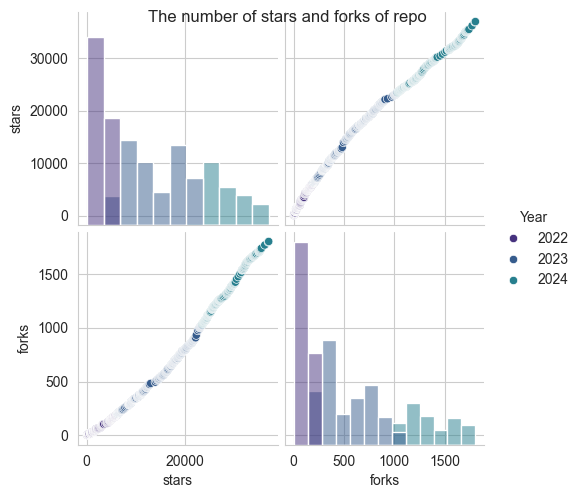

In [81]:
sns.pairplot(data=df_temp,hue='Year' ,diag_kind='hist')
plt.suptitle('The number of stars and forks of repo')

In [82]:
import networkx as nx

In [83]:
G = nx.Graph()
df_temp = pd.DataFrame()
df_temp['Author'] = pr_df['Author'].copy()
df_temp['Reviewer'] = pr_df['Reviewer'].copy()

In [84]:
print(df_temp['Author'].nunique())
print(df_temp['Reviewer'].nunique())

471
52


In [85]:
df_cleaned = df_temp.dropna(subset=['Reviewer','Author'])
df_cleaned = df_cleaned.reset_index(drop=True)

In [86]:
df_cleaned = df_cleaned.drop_duplicates(subset=['Author', 'Reviewer'])
df_cleaned


Author         Reviewer
0     alextran1502          jrasm91
1         Chiogros     alextran1502
2      EnricoBilla      EnricoBilla
3            jbaez     alextran1502
5          shruuub         ibizaman
...            ...              ...
3219       weblate      zackpollard
3237    mycroftsnm     alextran1502
3240    stephen304          jrasm91
3246     danielhep     alextran1502
3249      waclaw66  michelheusschen

[678 rows x 2 columns]

In [87]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [88]:
df_cleaned

Author         Reviewer
0    alextran1502          jrasm91
1        Chiogros     alextran1502
2     EnricoBilla      EnricoBilla
3           jbaez     alextran1502
4         shruuub         ibizaman
..            ...              ...
673       weblate      zackpollard
674    mycroftsnm     alextran1502
675    stephen304          jrasm91
676     danielhep     alextran1502
677      waclaw66  michelheusschen

[678 rows x 2 columns]

In [89]:
for i in range(df_cleaned.shape[0]-1):
    if df_cleaned['Reviewer'].loc[i] !='':
        G.add_edge(df_cleaned['Author'].loc[i],df_cleaned['Reviewer'].loc[i])

In [90]:
loops = list(nx.selfloop_edges(G))
G.remove_edges_from(loops)

In [91]:
G.edges()

EdgeView([('alextran1502', 'jrasm91'), ('alextran1502', 'Chiogros'), ('alextran1502', 'jbaez'), ('alextran1502', 'EnricoBilla'), ('alextran1502', 'zackpollard'), ('alextran1502', 'matthinc'), ('alextran1502', 'xpwmaosldk'), ('alextran1502', 'fyfrey'), ('alextran1502', 'Eidenz'), ('alextran1502', 'TCVinNYC'), ('alextran1502', 'panoti'), ('alextran1502', 'bo0tzz'), ('alextran1502', 'ViViDboarder'), ('alextran1502', 'bt90'), ('alextran1502', 'klejejs'), ('alextran1502', 'samip5'), ('alextran1502', 'Zlendy'), ('alextran1502', 'martyfuhry'), ('alextran1502', 'michelheusschen'), ('alextran1502', 'brighteyed'), ('alextran1502', 'faupau03'), ('alextran1502', 'stumpylog'), ('alextran1502', 'SteffenAuer'), ('alextran1502', 'truedem0n'), ('alextran1502', 'mark-monteiro'), ('alextran1502', 'mtaberna'), ('alextran1502', 'mertalev'), ('alextran1502', 'wittymap'), ('alextran1502', 'dependabot[bot]'), ('alextran1502', 'evanphilip'), ('alextran1502', 'renovate[bot]'), ('alextran1502', 'uhthomas'), ('al

In [92]:
contrib = max(G.degree, key=lambda x:x[1])
print(contrib[0])
print(contrib[1])


jrasm91
164


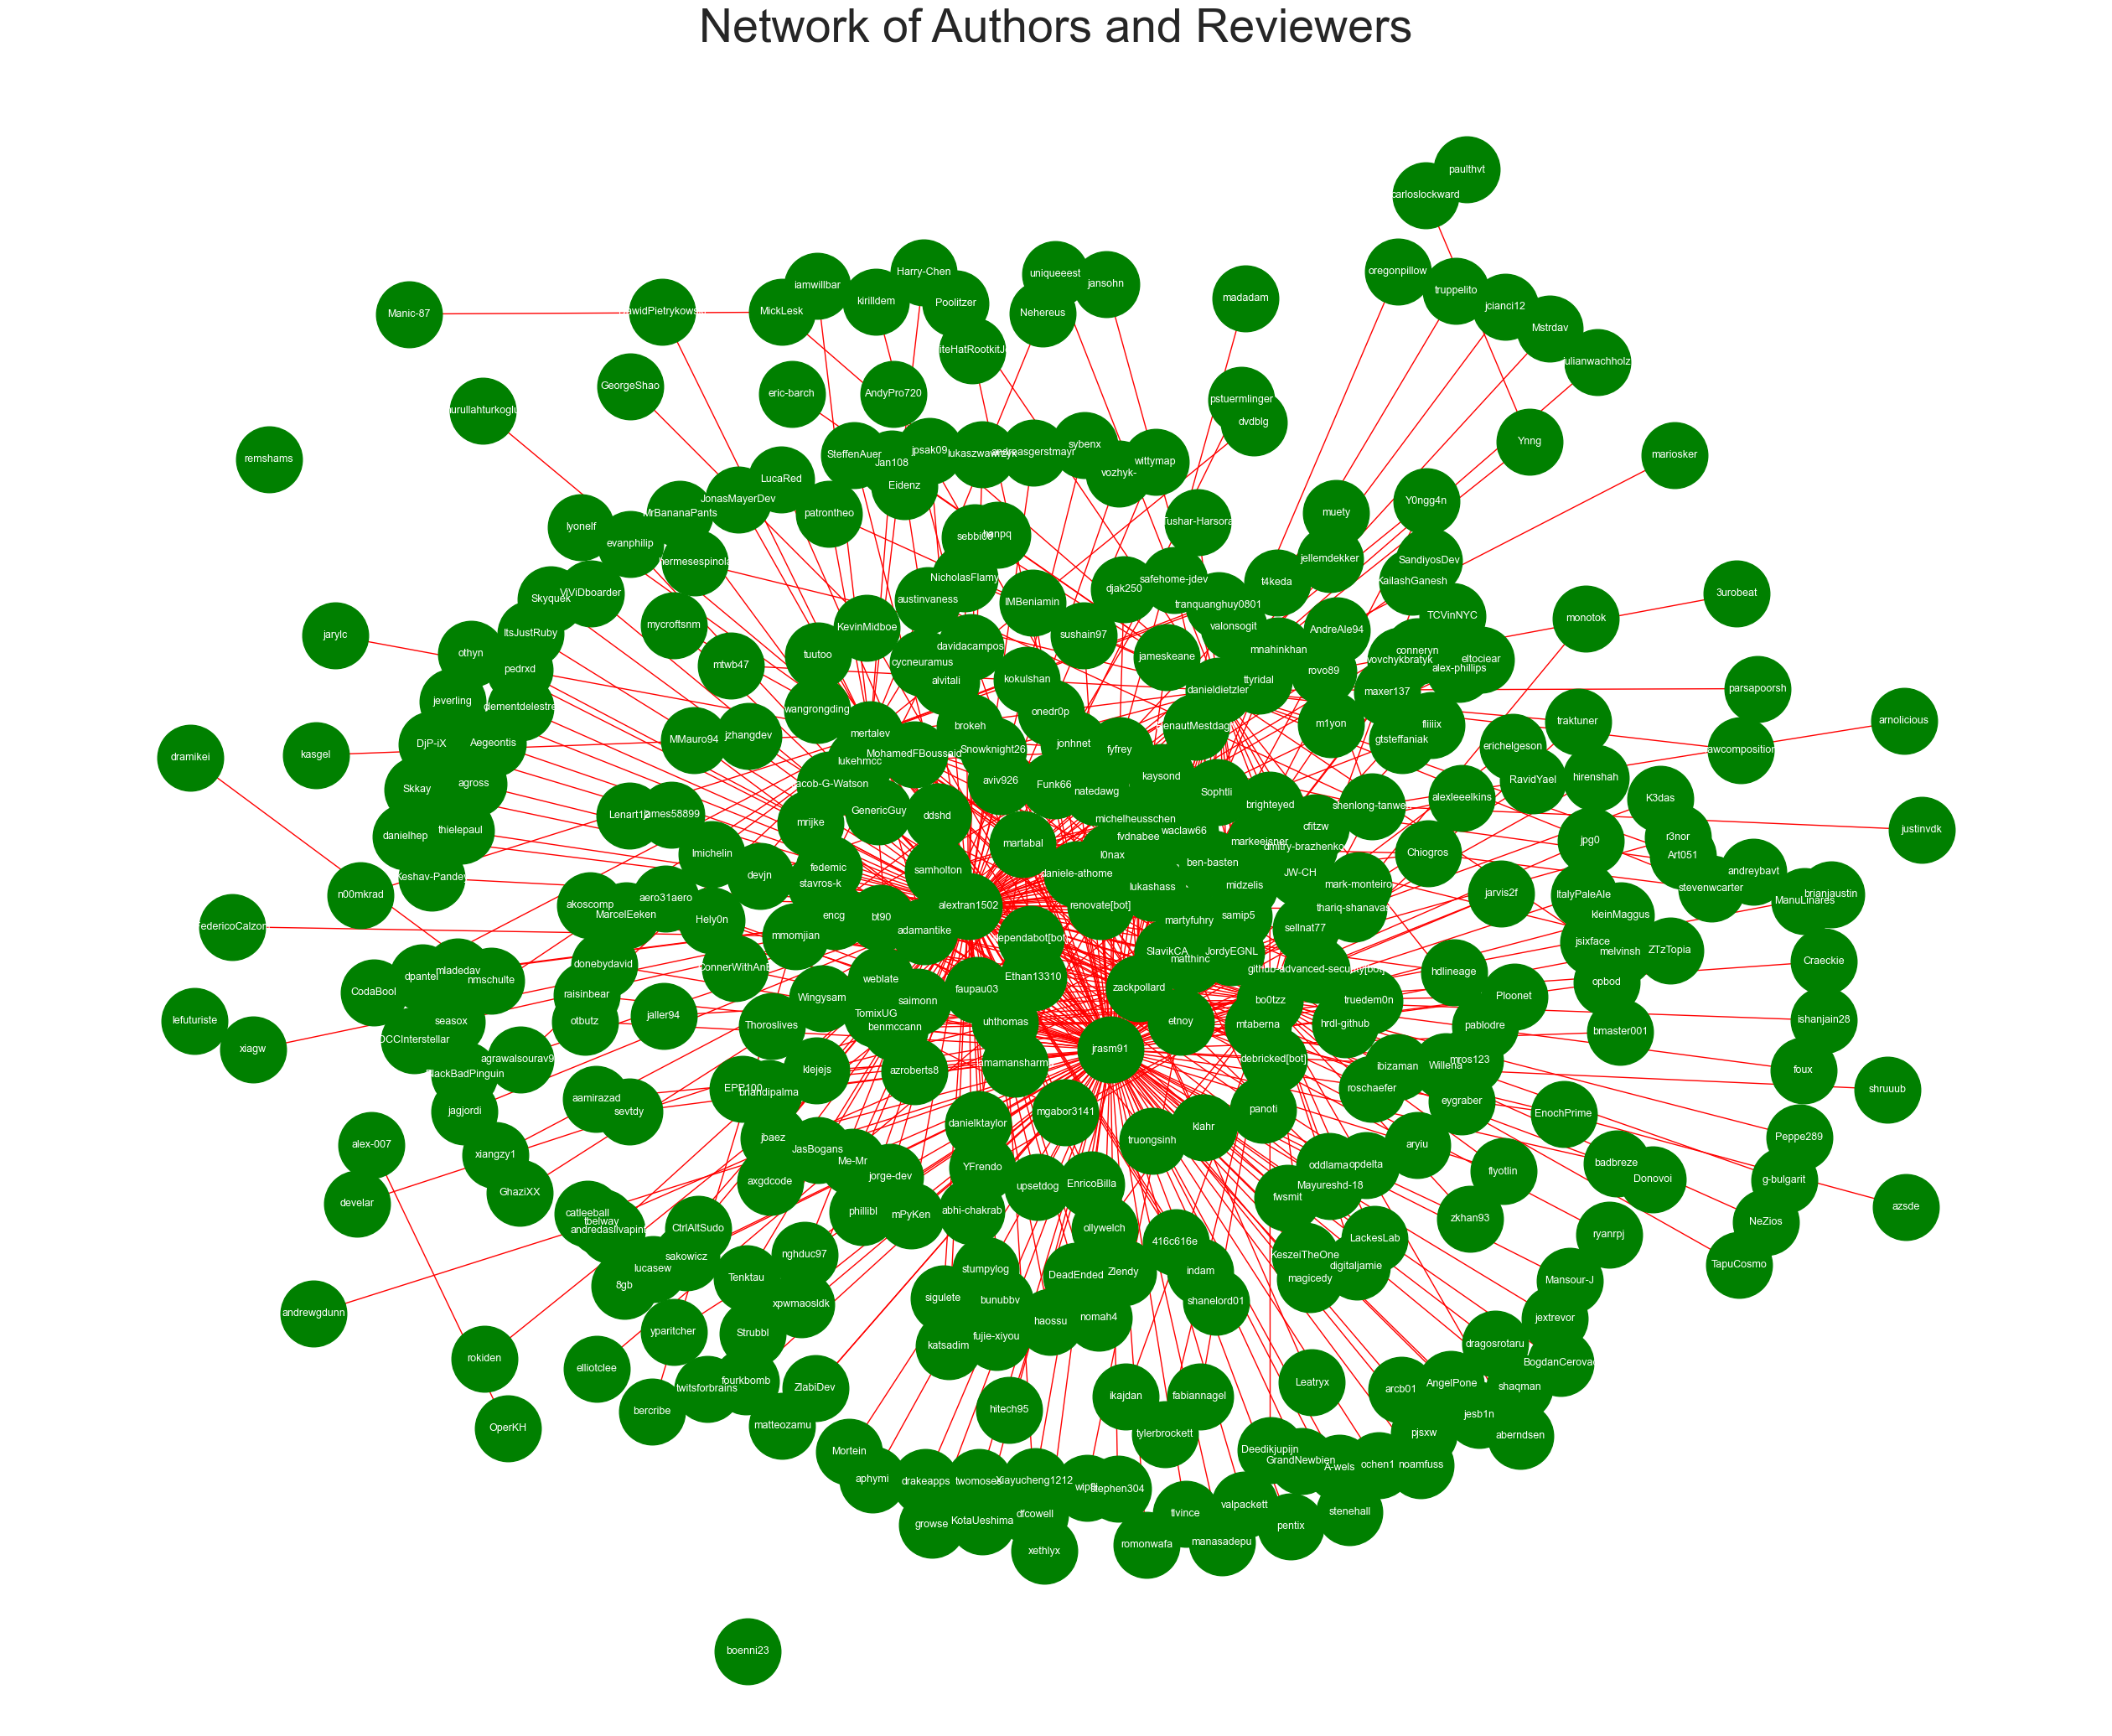

In [93]:
pos = nx.spring_layout(G, k=0.3) 
plt.figure(figsize=(25, 20))  
nx.draw(G, pos, with_labels=True, node_size=3200, font_size=9, font_color='white', node_color='green', edge_color='red')
plt.title('Network of Authors and Reviewers', fontsize=40)
plt.show()

In [94]:
print(G.number_of_nodes())
print(G.number_of_edges())

358
594


In [95]:
issue_df

Author  Comment user          Created_at           Closed_at  \
0     alextran1502           NaN 2022-02-05 07:04:44 2022-02-06 06:26:15   
1     alextran1502           NaN 2022-02-06 06:37:08 2022-02-06 06:50:47   
2     alextran1502  alextran1502 2022-02-06 06:37:24 2022-02-08 03:44:44   
3     alextran1502  alextran1502 2022-02-06 06:37:29 2022-02-08 06:27:24   
4     alextran1502           NaN 2022-02-06 06:57:52 2022-02-07 02:32:09   
...            ...           ...                 ...                 ...   
3033     Mubelotix      mmomjian 2024-06-14 15:21:48 2024-06-14 15:25:11   
3034      seanmuth           NaN 2024-06-14 15:53:39 2024-06-14 15:55:07   
3035      arnar-th        bo0tzz 2024-06-14 18:32:00 2024-06-14 21:26:48   
3036  manuelcortez           NaN 2024-06-14 22:39:28                 NaT   
3037      eygraber           NaN 2024-06-14 23:52:27 2024-06-15 00:56:58   

       State           Labels         Assignees        Date  duration  
0     closed      ['feature']  ['alextran1502']  2022-02-05   84091.0  
1     closed               []                []  2022-02-06     819.0  
2     closed  ['enhancement']                []  2022-02-06  162440.0  
3     closed  ['enhancement']                []  2022-02-06  172195.0  
4     closed  ['enhancement']                []  2022-02-06   70457.0  
...      ...              ...               ...         ...       ...  
3033  closed               []                []  2024-06-14     203.0  
3034  closed               []                []  2024-06-14      88.0  
3035  closed               []                []  2024-06-14   10488.0  
3036    open               []                []  2024-06-14       NaT  
3037  closed               []                []  2024-06-14    3871.0  

[3038 rows x 9 columns]

In [96]:
issue_df.dtypes

Author                  object
Comment user            object
Created_at      datetime64[ns]
Closed_at       datetime64[ns]
State                   object
Labels                  object
Assignees               object
Date                    object
duration                object
dtype: object

In [97]:
df_temp

Author         Reviewer
0      alextran1502              NaN
1           schklom              NaN
2      alextran1502              NaN
3      alextran1502              NaN
4      alextran1502              NaN
...             ...              ...
4413    zackpollard           bo0tzz
4414   alextran1502          jrasm91
4415    zackpollard          jrasm91
4416       waclaw66  michelheusschen
4417  richard-salam              NaN

[4418 rows x 2 columns]

In [98]:
df_cleaned

Author         Reviewer
0    alextran1502          jrasm91
1        Chiogros     alextran1502
2     EnricoBilla      EnricoBilla
3           jbaez     alextran1502
4         shruuub         ibizaman
..            ...              ...
673       weblate      zackpollard
674    mycroftsnm     alextran1502
675    stephen304          jrasm91
676     danielhep     alextran1502
677      waclaw66  michelheusschen

[678 rows x 2 columns]

In [99]:
G2 = nx.Graph()
df_temp = pd.DataFrame()
df_temp['Author'] = issue_df['Author'].copy()
df_temp['Comment user'] = issue_df['Comment user'].copy()

In [100]:
df_cleaned = df_temp.dropna(subset=['Comment user', 'Author'])
df_cleaned = df_cleaned.reset_index(drop=True)

In [101]:
df_cleaned = df_cleaned.drop_duplicates(subset=['Author', 'Comment user'])

In [102]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [103]:
import scipy as sp
for i in range(df_cleaned.shape[0]-1):
        G2.add_edge(df_cleaned['Comment user'].loc[i],df_cleaned['Author'].loc[i])

In [104]:
loops = list(nx.selfloop_edges(G2))
G2.remove_edges_from(loops)


In [105]:
G2.number_of_edges()

1811

In [106]:
max(G2.degree, key=lambda x:x[1])

('alextran1502', 591)

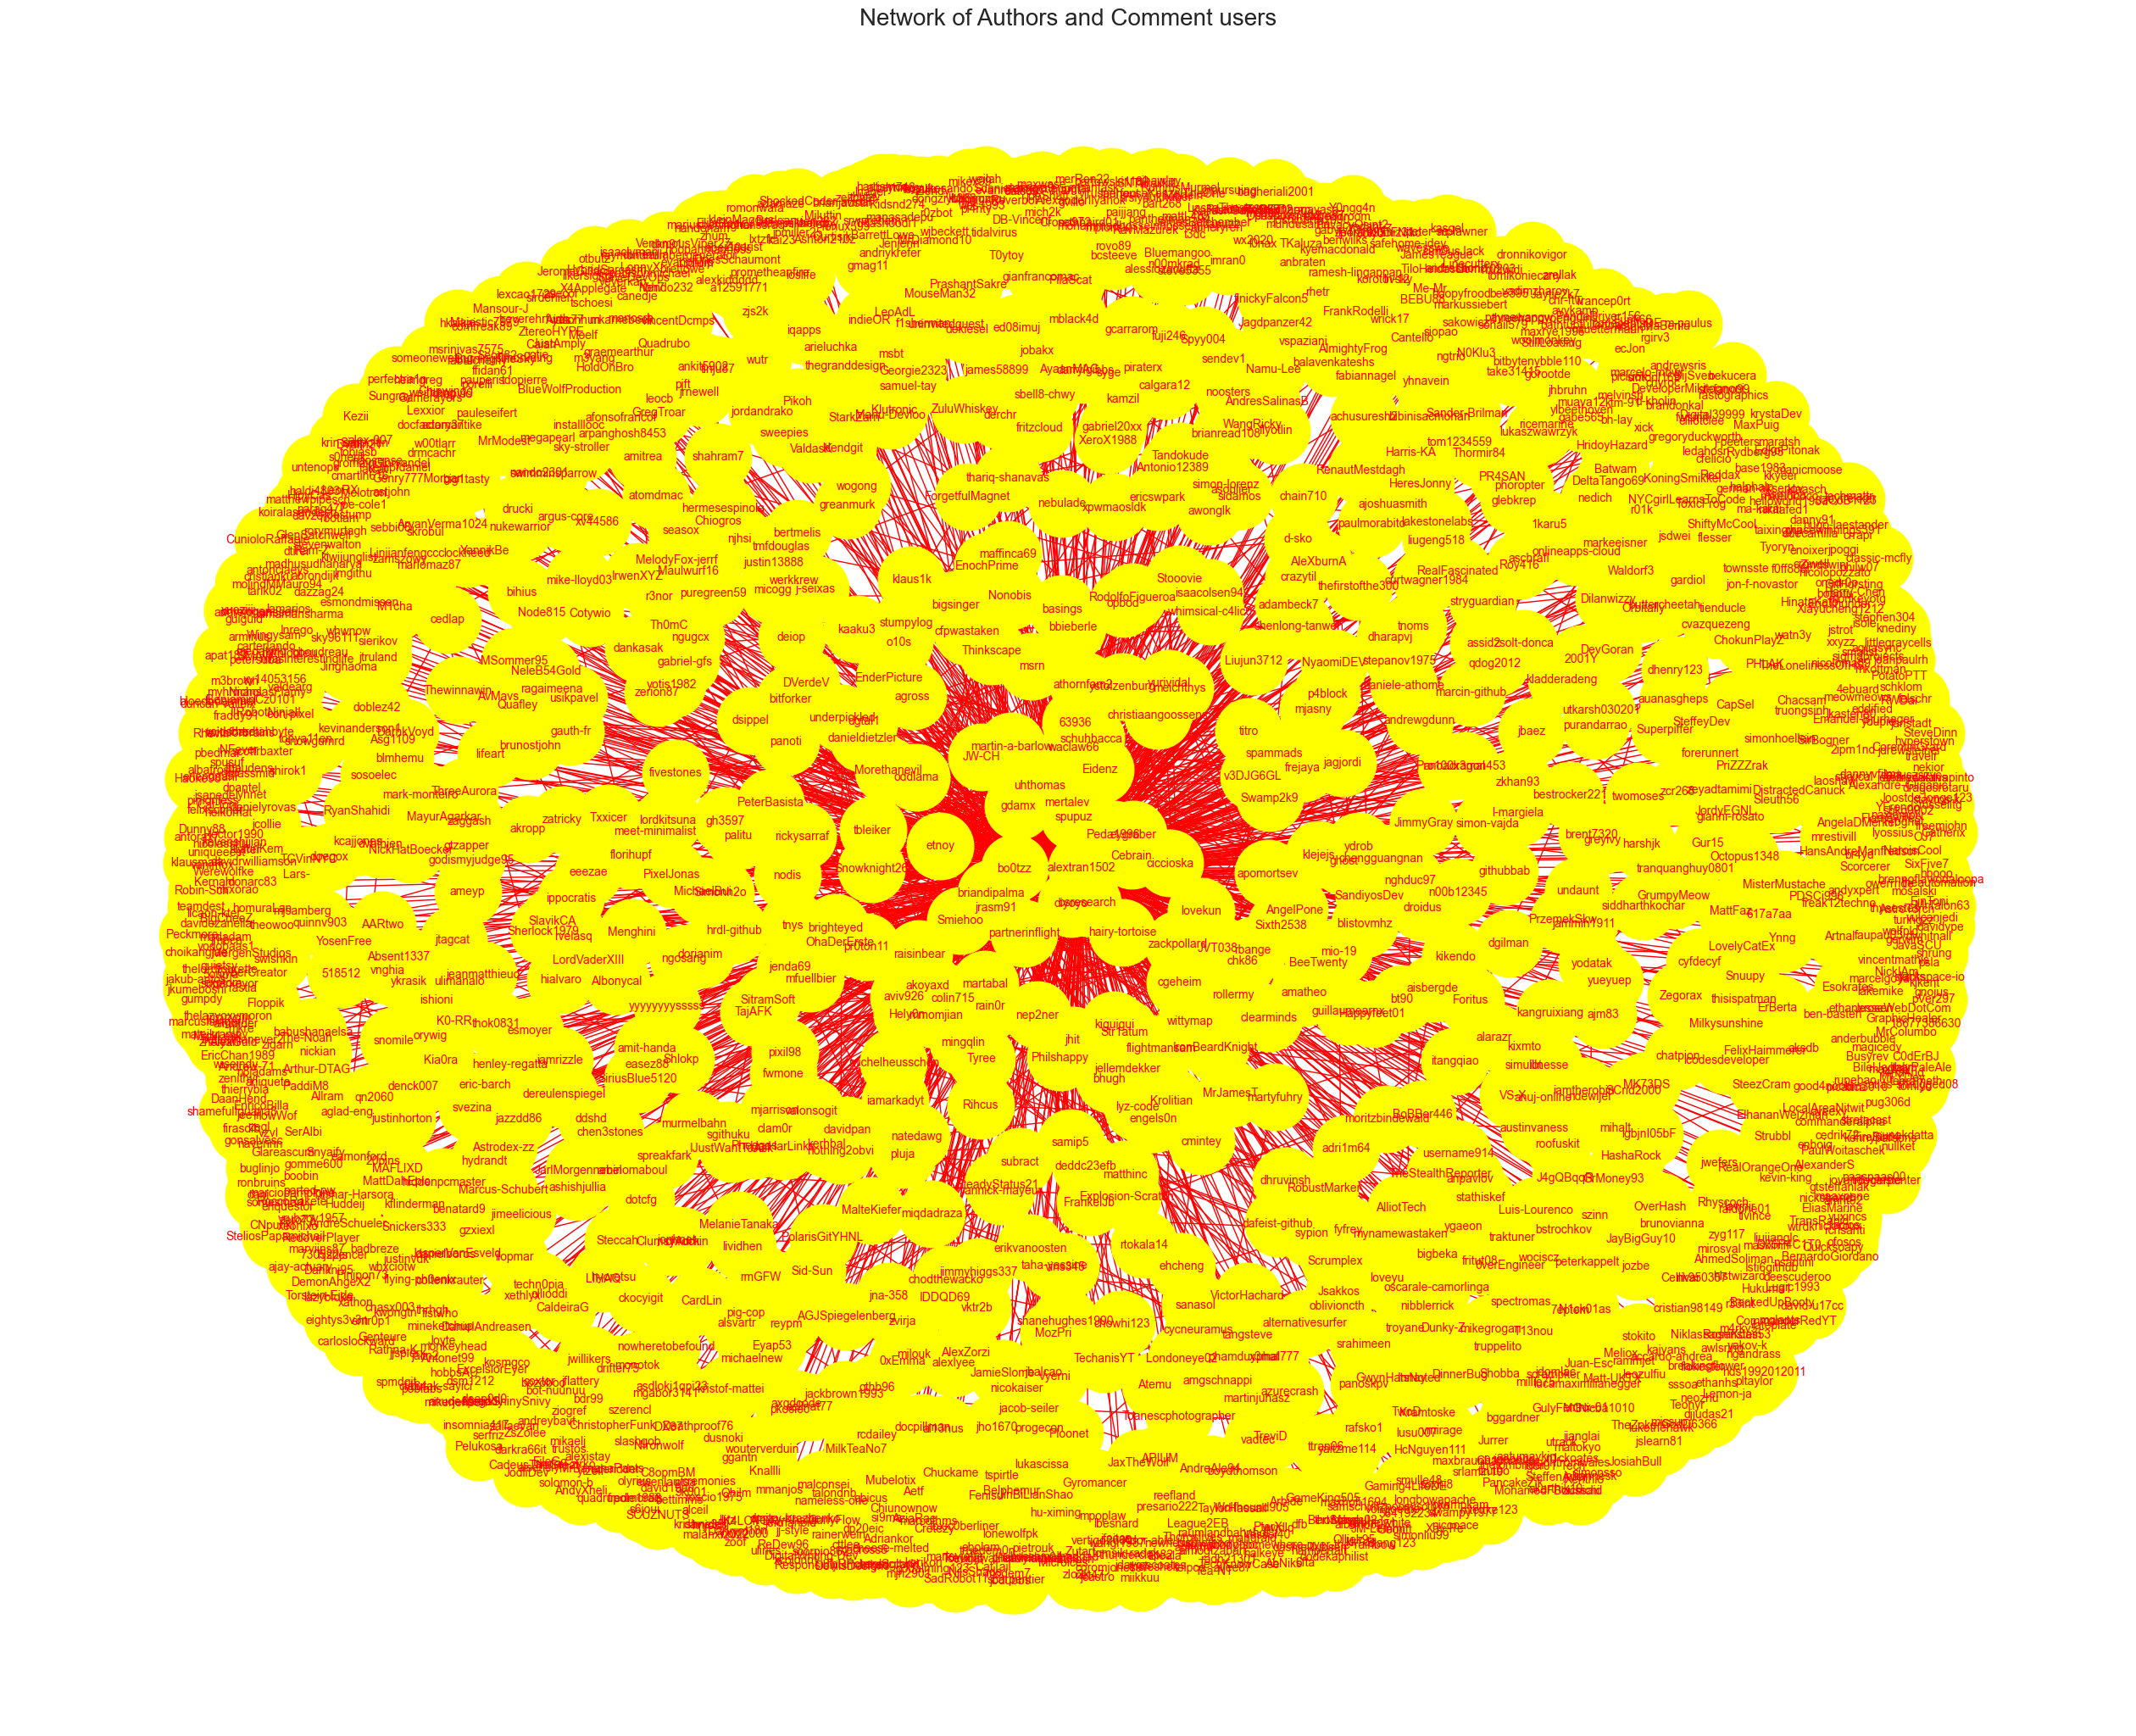

In [107]:
pos2 = nx.spring_layout(G2, k=0.3)
plt.figure(figsize=(25, 20))
nx.draw(G2,pos2, with_labels=True, node_size=3200, font_size=10, font_color='red', node_color='yellow', edge_color='red')
plt.title('Network of Authors and Comment users', fontsize=20)
plt.show()